# 이전 게시물

[1편. 이상탐지 너 뭐야?](https://dacon.io/codeshare/4758)  
[2편. 신용카드 사기 탐지(1부)](https://dacon.io/codeshare/4833)  
[3편. 신용카드 사기 탐지(2부)](https://dacon.io/codeshare/4853)  
[4편. 비지도 학습 기반의 머신러닝 기법(1부)](https://dacon.io/codeshare/4874)  
[5편. 비지도 학습 기반의 머신러닝 기법(2부)](https://dacon.io/codeshare/4890)  
[6편. 비지도 학습 기반의 머신러닝 기법을 활용한 이상탐지(1부)](https://dacon.io/codeshare/4954)    
[7편. 비지도 학습 기반의 머신러닝 기법을 활용한 이상탐지(2부)](https://dacon.io/codeshare/5000)  
[8편. 오토인코더 개념](https://dacon.io/codeshare/5064)

## 8. 핸즈온 오토인코더

앞 파트에서 살펴보았던 신용카드 사기 탐지 문제를 오토인코더로 사용한 결과이다.

오토인코더는 비지도 학습 알고리즘이지만 신경망을 사용한다.

### 오토인코더 개념


 오토인코더 실습을 진행하기전 개념에 대해 한번 더 살펴보고자 한다.




**오토인코더란?**

- 단순히 입력을 출력으로 복사하는 신경망이다.

- 네트워크에 여러가지 방법으로 제약을 줘 어려운 신경망으로 만든다.

- 구성 방식: 
    - 인코더: 인지 네트워크, 입력을 내부 표현으로 변환한다.

    - 디코더: 생성 네트워크, 내부 표현을 출력으로 변환한다.

- 특징:
입력과 출력층의 뉴런수가 동일하다는 것을 제외하면, Multi-Layer Perceptron과 동일한 구조이다.


- 예: hidden layer 의 뉴런수를 input layer 보다 작게하여 데이터를 압축하는 방법(Undercomplete Autoencoder)



**오토인코더의 구성 요소**

- 간단한 오토인코더 생성시, 입력층 ,은닉층, 출력층 포함한다.

- 입력층 : 행렬 x 을 오토인코더에 공급
- 은닉층(h): 입력층에 활성화 함수 적용 (f) , 
- 출력층(r(g(h))): 새롭게 재구성된 관측치

- 목표는 재구성 오차를 계산하는 것이며, 이를 계산하기 위해 원본 피처 행렬 x와 새롭게 재구성된 r 을 비교할 것이다.

**오토인코더 - 활성화 함수**





- 활성화 함수란? 노드 활성화될지 여부 결정할 때 사용되는 함수로 각 계층의 가중치와 입력값에 적용된다.


- 활성화 함수의 활성화
    - Y을 구한 후 Y가 특정 임곗값을 초과하는 경우 활성화된다.
    - 활성화시, 주어진 노드의 정보가 다음 계층으로 전달한다.   

- 활성화 함수의 종류
    - 범위 제한이 없는 선형 활성화 함수와 비선형 활성화 함수 중 선택이 가능하다.

여기서 **비선형 활성화 함수**에 대해 자세히 알아보도록 하겠다.
비선형 활성화 함수는 종류가 다양하여, 범위가 제한적이나 무제한인 경우도 존재한다.


- 시그모이드 함수 : 범위 제한적 , 0과 1 사이의 활성화 값 생성한다.

- 하이퍼볼릭 탄젠트 함수: 범위 제한적, -1과 1 사이의 활성화 값 생성 , 경사도 시그모이드보다 가파르다.

- 정류선형유닛 함수(relu) : relu 는 Y값이 양수일때 범위 무제한이다.

- 소프트맥스 함수 : 신경망의 최종 활성화 함수로 사용한다.


### 데이터 준비

오토인코더를 시행하기 전 사용할 준비를 진행하였다.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 라이브러리 불러오기
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 및 모델 평가 관련 라이브러리'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''알고리즘 관련 라이브러리'''
import lightgbm as lgb

'''텐서플로 및 케라스 관련 라이브러리'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

In [ ]:
# 데이터 로드
# 데이터 로드
current_path = os.getcwd()
data = pd.read_csv('/content/drive/MyDrive/프로젝트/대외활동/데이크루 2기/credit_card/creditcard.csv')


- PCA의 모든 주성분과 Amount 피처로 dataX 행렬을 생성하였다.

- Class와 Time은 사용하지 않아 제외하였다.( Class 레이블은 dataY 행렬에 저장하였다.)


In [ ]:


dataX = data.copy().drop(['Class','Time'],axis=1)
dataY = data['Class'].copy()

- dataX 행렬 피처 표준화하여 평균이 0 표준편차가 1이 되도록 하였다.


In [ ]:
# 데이터 스케일
featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

In [ ]:
# 훈련 및 테스트 셋으로 분할 
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                     random_state=2018, stratify=dataY)
    
X_train_AE = X_train.copy()
X_test_AE = X_test.copy()

- anomalyScore 함수는 매우 중요하다.
    - 오차가 0에 가까운 거래는 재구성 오차가 가장 낮으며 정상이고, 1에 가까운 거래는 가장 비정상이므로 사기 가능성이 크다.



In [ ]:
# 평가 함수(이상치 스코어 함수) 및 그래프 함수 정의
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF) - \
                   np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'], \
                               preds['anomalyScore'])
    average_precision = average_precision_score( \
                        preds['trueLabel'], preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
        {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the \
        curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds, average_precision  ### diff

### 선형 활성화 함수를 가진 2-계층

2- 계층 신경망은 은닉층을 1개 가지고 있다.

은닉층의 개수에 출력층을 더한 것만 신경망의 계층 수에 포함이 된다.


신경망을 구축하기 위해 먼저 순차모델을 호출하였다.

순차모델은 계층을 선형으로 쌓는 것으로, 원하는 계층 유형을 컴파일 하기 전, 모델에 적용한다.


In [ ]:
 # 모델 1
# 선형 활성화 함수로 구성된 2-계층 완전오토인코더
# 신경망 API 호출
model = Sequential()

# 입력층에 선형 활성화 함수 적용
# 입력 계층과 동일한 29개 노드를 가진 은닉층 생성

#완전 오토인코더 사용(은닉층 노드 수 = 입력층 노드 수)
model.add(Dense(units=29, activation='linear',input_dim=29))

# 은닉층에 선형 활성화 함수 적용
# 29개 노드를 가진 출력층 생성

# 29개인 이유?: 최종 재구성 행렬이 원본 행렬과 동일한 차원을 가져야함
 
model.add(Dense(units=29, activation='linear'))

이 후 설계된 계층을 컴파일하기 위해 가중치 학습을 가이드하는 손실 함수를 선택하였다.

In [ ]:
# 모델 컴파일

#평가 지표 : 평균 제곱 오차
# 재구성 오차를 기반으로 모델을 평가한다
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

다음으로는 모델을 훈련시키는 과정이다.
에폭 횟수와 배치 크기를 선택한다음 적합 메소드를 호출하여 훈련 프로세스를 시작한다.

여기서 배치는 다음 그레이디언크로 업데이트 되기 전 신경망이 훈련하는 샘플 수를 선정한다.

또한 epoch 횟수는 신경망으로 전달하는 전체 데이터셋에서 훈련이 시행되는 횟수이다.

In [ ]:
# 모델 훈련
num_epochs = 10
batch_size = 32

#모델 검증
history = model.fit(x=X_train_AE, y=X_train_AE,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_AE, X_train_AE),
                    verbose=1)

Epoch 1/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0784 - accuracy: 0.8987 - val_loss: 0.0030 - val_accuracy: 0.9877
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0017 - accuracy: 0.9875 - val_loss: 7.0982e-04 - val_accuracy: 0.9912
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 6.9799e-04 - accuracy: 0.9927 - val_loss: 4.0600e-08 - val_accuracy: 0.9999
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 7.0835e-04 - accuracy: 0.9944 - val_loss: 2.2699e-05 - val_accuracy: 0.9985
Epoch 5/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0010 - accuracy: 0.9944 - val_loss: 6.3001e-05 - val_accuracy: 0.9970
Epoch 6/10
5964/5964 [==============================] - 20s 3ms/step - loss: 3.8079e-04 - accuracy: 0.9951 - val_loss: 4.1949e-04 - val_accuracy: 0.9918
Epoch 7/10
5964/5964 [==============================] - 21s 4ms/step - loss: 7.3118e-04 - accuracy

원하는 최적화 결과일까?


- 원인: 은닉층과 입력층의 차원 수가 동일한 완전 오토인코더이다. 
- 결과: 훈련셋 검증셋 모두 낮다.

2938/2938 [==============================] - 4s 1ms/step


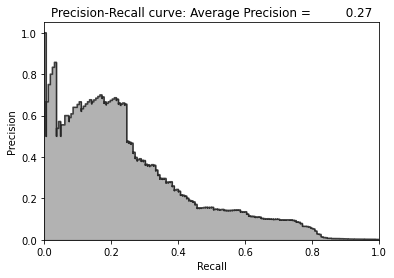

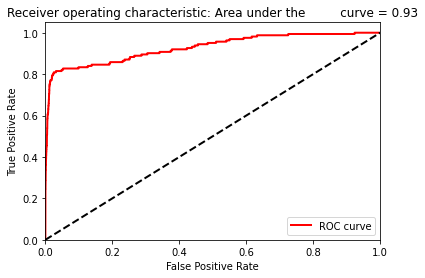

In [ ]:
# 테스트 셋에 대한 평가
predictions = model.predict(X_test, verbose=1)
anomalyScoresAE = anomalyScores(X_test, predictions)
preds = plotResults(y_test, anomalyScoresAE, True)
model.reset_states()

Epoch 1/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0735 - accuracy: 0.8959 - val_loss: 4.6742e-04 - val_accuracy: 0.9920
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.4054e-04 - accuracy: 0.9945 - val_loss: 5.4310e-07 - val_accuracy: 0.9999
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 6.5299e-04 - accuracy: 0.9939 - val_loss: 0.0024 - val_accuracy: 0.9861
Epoch 4/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0014 - accuracy: 0.9944 - val_loss: 7.1182e-06 - val_accuracy: 0.9988
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 4.9873e-04 - accuracy: 0.9955 - val_loss: 0.0011 - val_accuracy: 0.9907
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 5.4044e-04 - accuracy: 0.9940 - val_loss: 2.2068e-04 - val_accuracy: 0.9891
Epoch 7/10
5964/5964 [==============================] - 17s 3ms/step - loss: 5.8158e-04 - accuracy

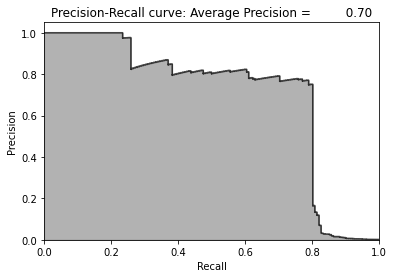

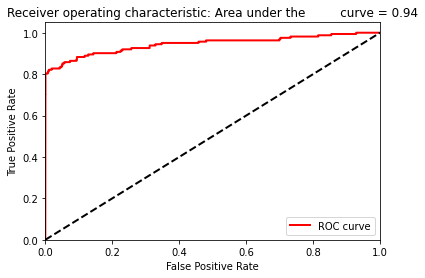

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.1132 - accuracy: 0.8598 - val_loss: 0.0053 - val_accuracy: 0.9777
Epoch 2/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0015 - accuracy: 0.9876 - val_loss: 3.0504e-06 - val_accuracy: 0.9994
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 7.6397e-04 - accuracy: 0.9941 - val_loss: 0.0040 - val_accuracy: 0.9633
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 4.6260e-04 - accuracy: 0.9966 - val_loss: 1.8018e-05 - val_accuracy: 0.9977
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 4.4828e-04 - accuracy: 0.9941 - val_loss: 0.0067 - val_accuracy: 0.9676
Epoch 6/10
5964/5964 [==============================] - 17s 3ms/step - loss: 6.1763e-04 - accuracy: 0.9943 - val_loss: 2.4999e-05 - val_accuracy: 0.9976
Epoch 7/10
5964/5964 [==============================] - 21s 4ms/step - loss: 4.9127e-04 - accuracy: 0.

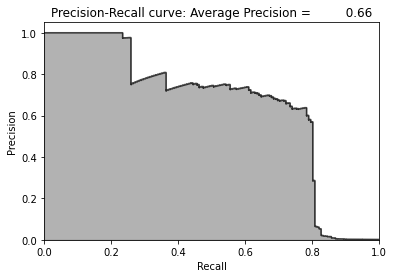

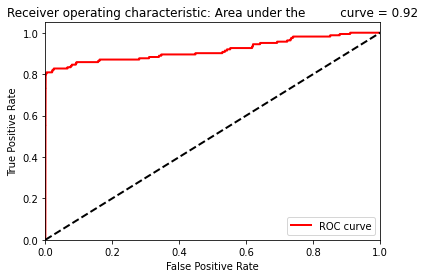

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0976 - accuracy: 0.8906 - val_loss: 7.9297e-04 - val_accuracy: 0.9920
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.5152e-04 - accuracy: 0.9921 - val_loss: 7.0883e-04 - val_accuracy: 0.9873
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 8.5209e-04 - accuracy: 0.9929 - val_loss: 5.8288e-04 - val_accuracy: 0.9965
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 6.5287e-04 - accuracy: 0.9938 - val_loss: 1.3963e-05 - val_accuracy: 0.9994
Epoch 5/10
5964/5964 [==============================] - 17s 3ms/step - loss: 6.7786e-04 - accuracy: 0.9940 - val_loss: 6.3111e-04 - val_accuracy: 0.9896
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 5.2345e-04 - accuracy: 0.9954 - val_loss: 0.0013 - val_accuracy: 0.9893
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 5.8194e-04 - 

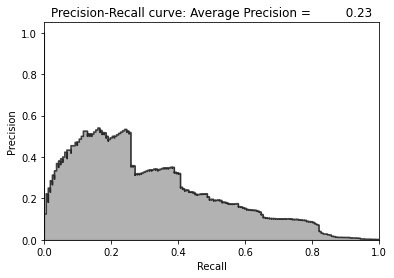

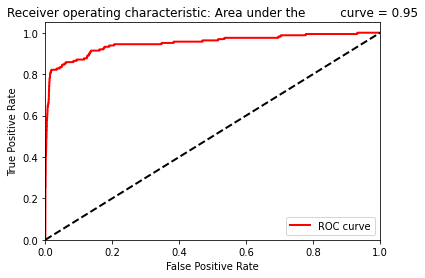

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.1100 - accuracy: 0.8706 - val_loss: 0.0020 - val_accuracy: 0.9849
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0028 - accuracy: 0.9845 - val_loss: 0.0029 - val_accuracy: 0.9774
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0019 - accuracy: 0.9874 - val_loss: 1.8069e-04 - val_accuracy: 0.9959
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.4118e-04 - accuracy: 0.9933 - val_loss: 0.0021 - val_accuracy: 0.9908
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 4.3834e-04 - accuracy: 0.9958 - val_loss: 5.7106e-06 - val_accuracy: 0.9993
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 5.6434e-04 - accuracy: 0.9932 - val_loss: 3.7701e-04 - val_accuracy: 0.9956
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 6.1648e-04 - accuracy: 0.9950

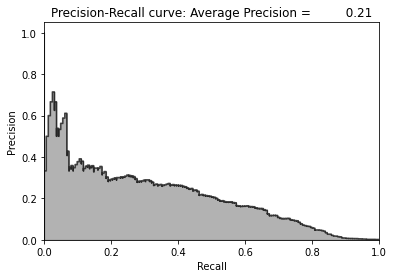

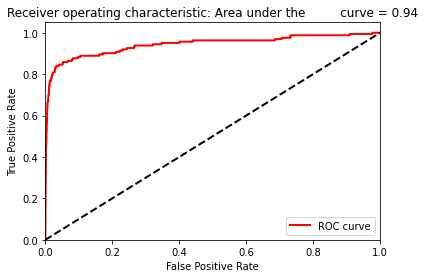

Epoch 1/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0774 - accuracy: 0.8984 - val_loss: 5.1533e-04 - val_accuracy: 0.9925
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 8.7399e-04 - accuracy: 0.9914 - val_loss: 2.7288e-05 - val_accuracy: 0.9982
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 6.3534e-04 - accuracy: 0.9942 - val_loss: 4.0604e-04 - val_accuracy: 0.9914
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 5.6516e-04 - accuracy: 0.9939 - val_loss: 0.0010 - val_accuracy: 0.9927
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 6.2706e-04 - accuracy: 0.9943 - val_loss: 4.5507e-05 - val_accuracy: 0.9977
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 4.6858e-04 - accuracy: 0.9946 - val_loss: 8.1601e-04 - val_accuracy: 0.9917
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 5.5460e-04 - 

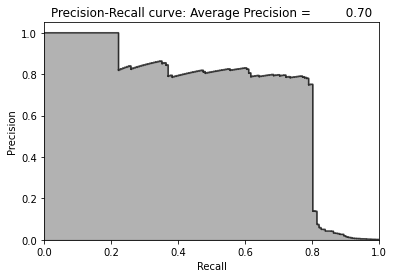

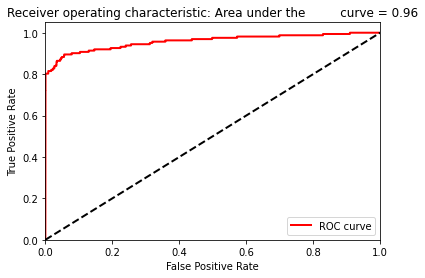

Epoch 1/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0821 - accuracy: 0.8971 - val_loss: 0.0060 - val_accuracy: 0.9680
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0015 - accuracy: 0.9881 - val_loss: 4.9483e-05 - val_accuracy: 0.9984
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 7.2399e-04 - accuracy: 0.9947 - val_loss: 8.7279e-04 - val_accuracy: 0.9889
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.5364e-04 - accuracy: 0.9937 - val_loss: 1.1318e-05 - val_accuracy: 0.9986
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 4.8365e-04 - accuracy: 0.9945 - val_loss: 2.0414e-04 - val_accuracy: 0.9963
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 4.4143e-04 - accuracy: 0.9952 - val_loss: 8.0348e-04 - val_accuracy: 0.9980
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 4.4670e-04 - accu

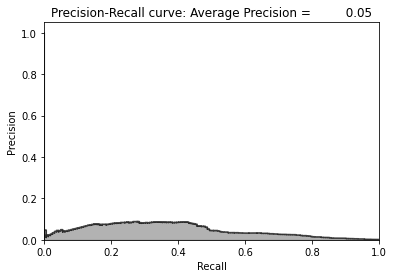

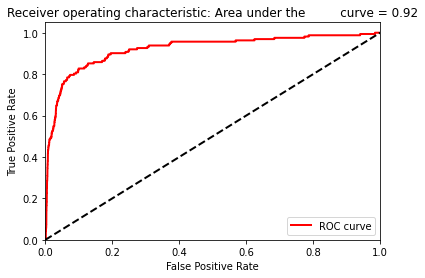

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0885 - accuracy: 0.8833 - val_loss: 0.0039 - val_accuracy: 0.9611
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0011 - accuracy: 0.9912 - val_loss: 1.1071e-05 - val_accuracy: 0.9988
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 7.7457e-04 - accuracy: 0.9947 - val_loss: 1.5591e-04 - val_accuracy: 0.9935
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 6.2632e-04 - accuracy: 0.9934 - val_loss: 0.0019 - val_accuracy: 0.9847
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 7.1167e-04 - accuracy: 0.9944 - val_loss: 6.9157e-06 - val_accuracy: 0.9982
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 5.2047e-04 - accuracy: 0.9942 - val_loss: 0.0019 - val_accuracy: 0.9887
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 5.6498e-04 - accuracy: 0.

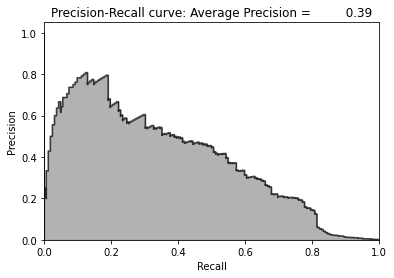

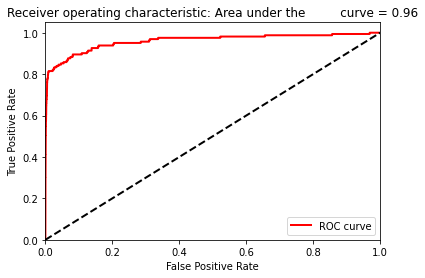

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0884 - accuracy: 0.8892 - val_loss: 0.0019 - val_accuracy: 0.9855
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0012 - accuracy: 0.9894 - val_loss: 4.2469e-05 - val_accuracy: 0.9979
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.0031e-04 - accuracy: 0.9925 - val_loss: 4.1192e-05 - val_accuracy: 0.9983
Epoch 4/10
5964/5964 [==============================] - 19s 3ms/step - loss: 9.4874e-04 - accuracy: 0.9935 - val_loss: 3.1915e-05 - val_accuracy: 0.9978
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 4.6678e-04 - accuracy: 0.9951 - val_loss: 3.6517e-04 - val_accuracy: 0.9919
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 4.8042e-04 - accuracy: 0.9949 - val_loss: 2.6021e-05 - val_accuracy: 0.9968
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 6.1454e-04 - accu

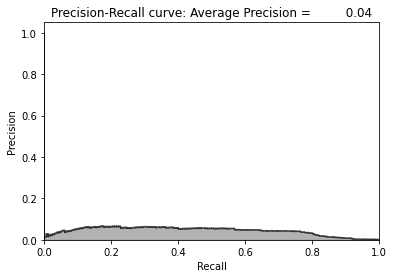

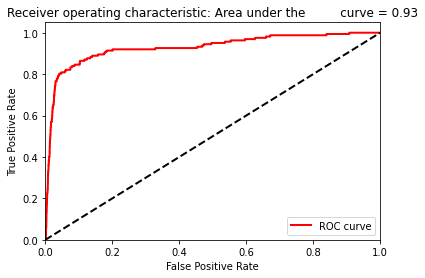

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0637 - accuracy: 0.9094 - val_loss: 0.0013 - val_accuracy: 0.9925
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0012 - accuracy: 0.9914 - val_loss: 7.9107e-06 - val_accuracy: 0.9988
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 6.0967e-04 - accuracy: 0.9955 - val_loss: 2.4838e-05 - val_accuracy: 0.9978
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 7.7733e-04 - accuracy: 0.9940 - val_loss: 0.0126 - val_accuracy: 0.9804
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 5.7012e-04 - accuracy: 0.9945 - val_loss: 1.5684e-04 - val_accuracy: 0.9934
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 4.8231e-04 - accuracy: 0.9941 - val_loss: 8.7479e-04 - val_accuracy: 0.9868
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 4.3814e-04 - accuracy

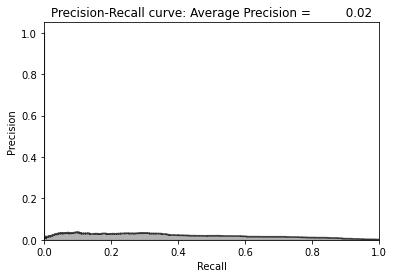

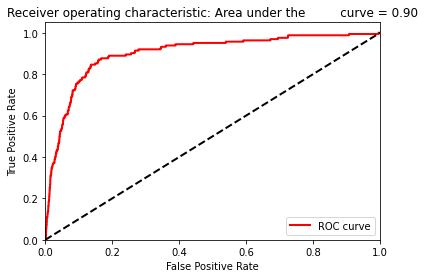

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0963 - accuracy: 0.8859 - val_loss: 0.0021 - val_accuracy: 0.9870
Epoch 2/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0016 - accuracy: 0.9870 - val_loss: 6.3983e-05 - val_accuracy: 0.9938
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 5.9242e-04 - accuracy: 0.9946 - val_loss: 0.0027 - val_accuracy: 0.9885
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 5.4864e-04 - accuracy: 0.9940 - val_loss: 5.1777e-04 - val_accuracy: 0.9940
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 7.2254e-04 - accuracy: 0.9940 - val_loss: 0.0037 - val_accuracy: 0.9755
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 4.7524e-04 - accuracy: 0.9944 - val_loss: 0.0023 - val_accuracy: 0.9883
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 7.7274e-04 - accuracy: 0.9941

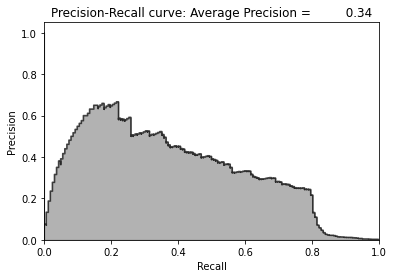

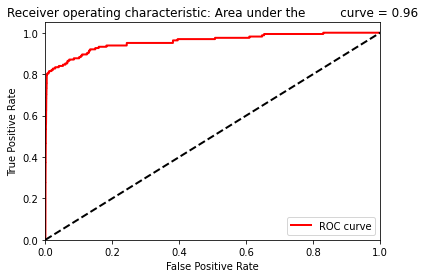

Mean average precision over 10 runs:  0.33429023694270354


[0.7024469962114125,
 0.6553025242467893,
 0.23230344616401924,
 0.21126388728732537,
 0.6995562694616652,
 0.0463325288284793,
 0.3887427325655773,
 0.04362113736843452,
 0.019970717750701923,
 0.34336212954263057]

In [ ]:
# 10번 실행 - 평균 정밀도의 평균 계산
test_scores = []
for i in range(0,10):
    # 신경망 API 호출
    model = Sequential()

    # 입력층에 선형 활성화 함수 적용
    # 입력층과 동일한 29개 노드를 가진 은닉층 생성
    model.add(Dense(units=29, activation='linear',input_dim=29))

    # 은닉층에 선형 활성화 함수 적용
    # 29개 노드를 가진 출력층 생성
    model.add(Dense(units=29, activation='linear'))

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # 모델 훈련
    num_epochs = 10
    batch_size = 32

    history = model.fit(x=X_train_AE, y=X_train_AE,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_train_AE, X_train_AE),
                        verbose=1)

    # 테스트 셋에 대한 평가
    predictions = model.predict(X_test, verbose=1)
    anomalyScoresAE = anomalyScores(X_test, predictions)
    preds, avgPrecision = plotResults(y_test, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    model.reset_states()

print("Mean average precision over 10 runs: ", np.mean(test_scores))
test_scores

In [ ]:
# 결과
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores

Mean average precision over 10 runs:  0.33429023694270354
Coefficient of variation over 10 runs:  0.7724546858826429


[0.7024469962114125,
 0.6553025242467893,
 0.23230344616401924,
 0.21126388728732537,
 0.6995562694616652,
 0.0463325288284793,
 0.3887427325655773,
 0.04362113736843452,
 0.019970717750701923,
 0.34336212954263057]

변동 계수는 0.88이다.

평균 정밀도의 평균값은 0.3이다.

평균 정밀도 범위는 0.02-0.72 사이이다.

->정밀도 평균값이 좋지 않으며 편차가 크므로 더 나은 오토인코더가 필요해 보인다.


### 선형 활성화 함수를 가진 과소완전 오토인코더 

- 은닉층 노드 수 만 변경하였다.
- (29-> 20) : 더 적은 수의 노드로 입력층 정보 추출하도록 강제하였다.

Epoch 1/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.3456 - accuracy: 0.5345 - val_loss: 0.2774 - val_accuracy: 0.5376
Epoch 2/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.2806 - accuracy: 0.5468 - val_loss: 0.2760 - val_accuracy: 0.5609
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2795 - accuracy: 0.5668 - val_loss: 0.2750 - val_accuracy: 0.5842
Epoch 4/10
5964/5964 [==============================] - 33s 6ms/step - loss: 0.2785 - accuracy: 0.5929 - val_loss: 0.2745 - val_accuracy: 0.5994
Epoch 5/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.2787 - accuracy: 0.5980 - val_loss: 0.2750 - val_accuracy: 0.6002
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2779 - accuracy: 0.6020 - val_loss: 0.2750 - val_accuracy: 0.5954
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2774 - accuracy: 0.6042 - val_loss: 0.2745 - val_ac

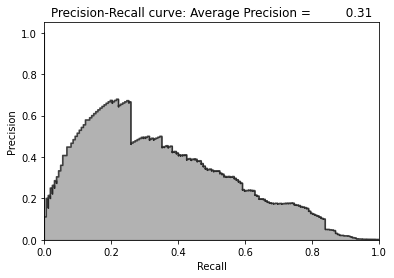

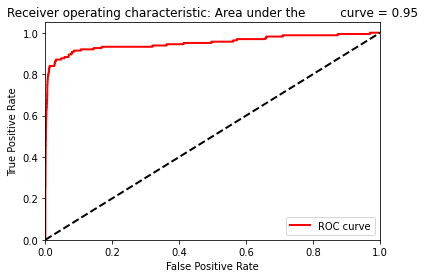

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.3395 - accuracy: 0.5302 - val_loss: 0.2790 - val_accuracy: 0.5713
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2826 - accuracy: 0.5806 - val_loss: 0.2781 - val_accuracy: 0.5823
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2798 - accuracy: 0.5753 - val_loss: 0.2759 - val_accuracy: 0.5901
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2793 - accuracy: 0.5930 - val_loss: 0.2750 - val_accuracy: 0.5966
Epoch 5/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2780 - accuracy: 0.5949 - val_loss: 0.2753 - val_accuracy: 0.5922
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2783 - accuracy: 0.5991 - val_loss: 0.2754 - val_accuracy: 0.5983
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2777 - accuracy: 0.5993 - val_loss: 0.2744 - val_ac

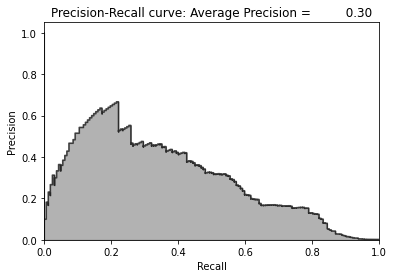

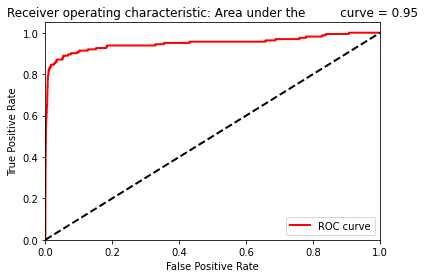

Epoch 1/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.3430 - accuracy: 0.5173 - val_loss: 0.2798 - val_accuracy: 0.5604
Epoch 2/10
5964/5964 [==============================] - 17s 3ms/step - loss: 0.2833 - accuracy: 0.5660 - val_loss: 0.2766 - val_accuracy: 0.5586
Epoch 3/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.2806 - accuracy: 0.5687 - val_loss: 0.2752 - val_accuracy: 0.5699
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2788 - accuracy: 0.5743 - val_loss: 0.2746 - val_accuracy: 0.5758
Epoch 5/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2784 - accuracy: 0.5819 - val_loss: 0.2748 - val_accuracy: 0.5826
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2761 - accuracy: 0.5837 - val_loss: 0.2752 - val_accuracy: 0.5745
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2772 - accuracy: 0.5760 - val_loss: 0.2753 - val_ac

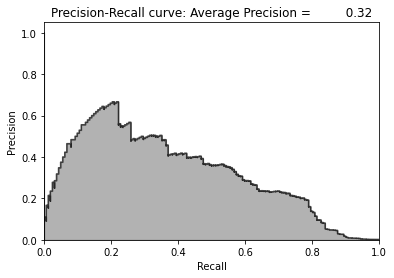

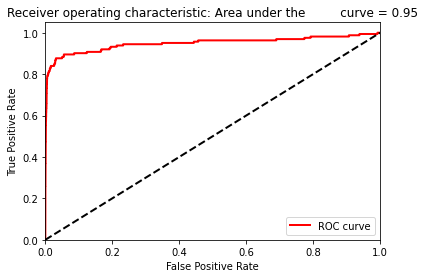

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.3440 - accuracy: 0.5327 - val_loss: 0.2771 - val_accuracy: 0.5738
Epoch 2/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.2798 - accuracy: 0.5646 - val_loss: 0.2762 - val_accuracy: 0.5594
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2794 - accuracy: 0.5643 - val_loss: 0.2755 - val_accuracy: 0.5592
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2780 - accuracy: 0.5551 - val_loss: 0.2745 - val_accuracy: 0.5664
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2774 - accuracy: 0.5663 - val_loss: 0.2751 - val_accuracy: 0.5680
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2776 - accuracy: 0.5768 - val_loss: 0.2744 - val_accuracy: 0.5764
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2773 - accuracy: 0.5768 - val_loss: 0.2740 - val_ac

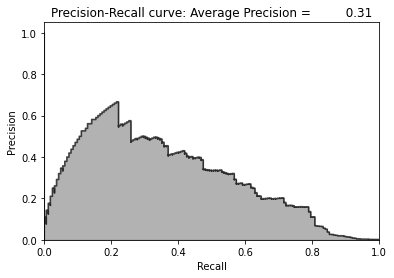

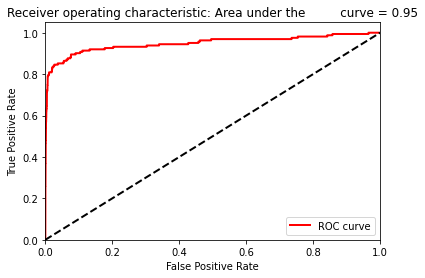

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.3461 - accuracy: 0.5293 - val_loss: 0.2793 - val_accuracy: 0.5505
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2813 - accuracy: 0.5480 - val_loss: 0.2766 - val_accuracy: 0.5527
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2805 - accuracy: 0.5465 - val_loss: 0.2826 - val_accuracy: 0.5509
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2790 - accuracy: 0.5613 - val_loss: 0.2757 - val_accuracy: 0.5542
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2787 - accuracy: 0.5713 - val_loss: 0.2753 - val_accuracy: 0.5650
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2780 - accuracy: 0.5633 - val_loss: 0.2743 - val_accuracy: 0.5733
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2780 - accuracy: 0.5796 - val_loss: 0.2741 - val_ac

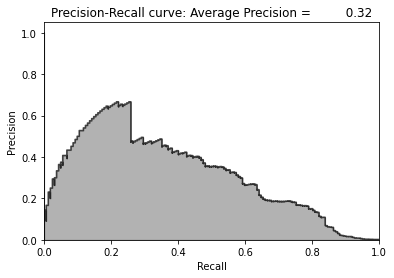

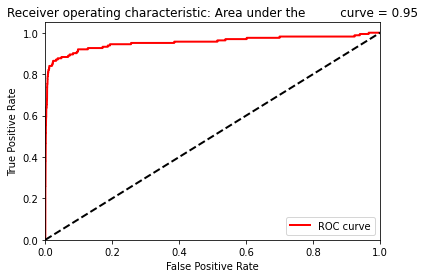

Epoch 1/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.4022 - accuracy: 0.5075 - val_loss: 0.2811 - val_accuracy: 0.5613
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2840 - accuracy: 0.5658 - val_loss: 0.2789 - val_accuracy: 0.5611
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2824 - accuracy: 0.5577 - val_loss: 0.2766 - val_accuracy: 0.5626
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2799 - accuracy: 0.5641 - val_loss: 0.2759 - val_accuracy: 0.5713
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2788 - accuracy: 0.5715 - val_loss: 0.2750 - val_accuracy: 0.5709
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2791 - accuracy: 0.5876 - val_loss: 0.2746 - val_accuracy: 0.5791
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2777 - accuracy: 0.5751 - val_loss: 0.2744 - val_ac

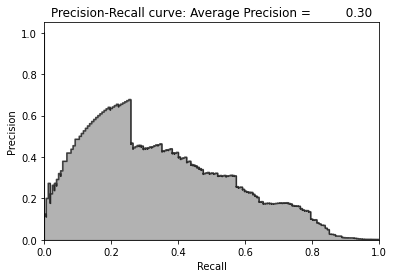

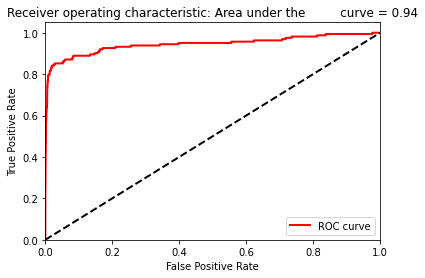

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.3539 - accuracy: 0.5297 - val_loss: 0.2803 - val_accuracy: 0.5744
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2832 - accuracy: 0.5477 - val_loss: 0.2770 - val_accuracy: 0.5660
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2804 - accuracy: 0.5648 - val_loss: 0.2772 - val_accuracy: 0.5671
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2787 - accuracy: 0.5642 - val_loss: 0.2753 - val_accuracy: 0.5742
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2784 - accuracy: 0.5725 - val_loss: 0.2752 - val_accuracy: 0.5784
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2785 - accuracy: 0.5788 - val_loss: 0.2747 - val_accuracy: 0.5834
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2781 - accuracy: 0.5927 - val_loss: 0.2751 - val_ac

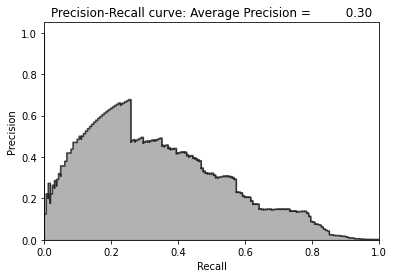

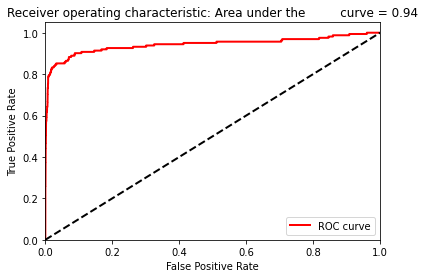

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.3584 - accuracy: 0.5435 - val_loss: 0.2794 - val_accuracy: 0.5676
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2824 - accuracy: 0.5605 - val_loss: 0.2762 - val_accuracy: 0.5711
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2792 - accuracy: 0.5691 - val_loss: 0.2753 - val_accuracy: 0.5677
Epoch 4/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2780 - accuracy: 0.5691 - val_loss: 0.2775 - val_accuracy: 0.5710
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.2785 - accuracy: 0.5733 - val_loss: 0.2744 - val_accuracy: 0.5731
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2778 - accuracy: 0.5811 - val_loss: 0.2777 - val_accuracy: 0.5789
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2773 - accuracy: 0.5809 - val_loss: 0.2742 - val_ac

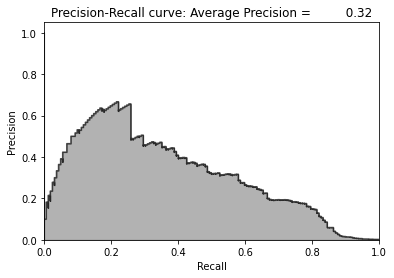

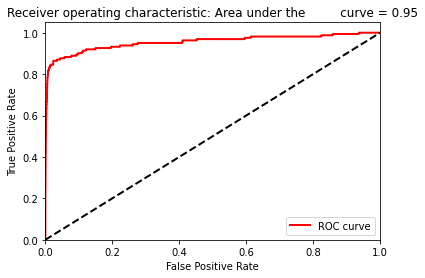

Epoch 1/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.3503 - accuracy: 0.5602 - val_loss: 0.2794 - val_accuracy: 0.5924
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2833 - accuracy: 0.5827 - val_loss: 0.2777 - val_accuracy: 0.5857
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.2810 - accuracy: 0.6020 - val_loss: 0.2764 - val_accuracy: 0.5960
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2790 - accuracy: 0.5929 - val_loss: 0.2773 - val_accuracy: 0.6058
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2794 - accuracy: 0.5998 - val_loss: 0.2750 - val_accuracy: 0.6045
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2790 - accuracy: 0.6029 - val_loss: 0.2749 - val_accuracy: 0.6000
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2779 - accuracy: 0.5955 - val_loss: 0.2747 - val_ac

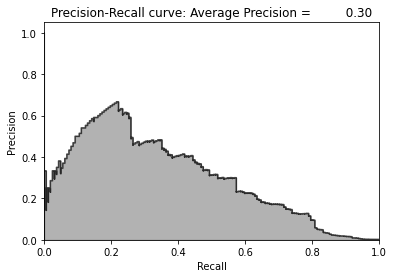

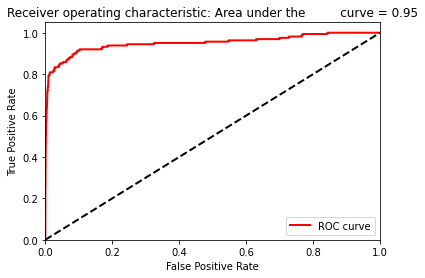

Epoch 1/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.3851 - accuracy: 0.5560 - val_loss: 0.2802 - val_accuracy: 0.6249
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2838 - accuracy: 0.6160 - val_loss: 0.2782 - val_accuracy: 0.6215
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2815 - accuracy: 0.6125 - val_loss: 0.2762 - val_accuracy: 0.6075
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2802 - accuracy: 0.6059 - val_loss: 0.2752 - val_accuracy: 0.5897
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2783 - accuracy: 0.5850 - val_loss: 0.2749 - val_accuracy: 0.5791
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.2784 - accuracy: 0.5885 - val_loss: 0.2747 - val_accuracy: 0.5712
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.2778 - accuracy: 0.5694 - val_loss: 0.2750 - val_ac

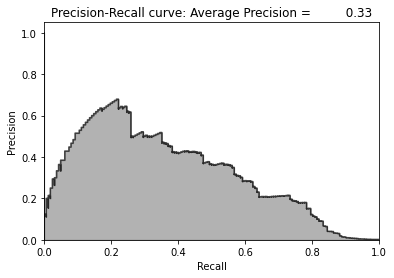

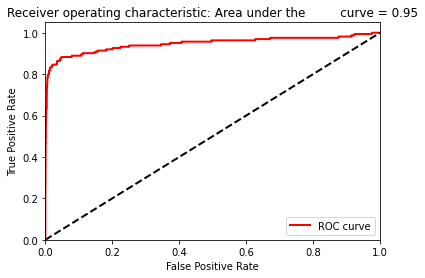

Mean average precision over 10 runs:  0.3101875431967668


[0.31378607152713217,
 0.30138244014615706,
 0.32394854247683513,
 0.3050069060131815,
 0.318861049386831,
 0.29876255449606265,
 0.29670829321316805,
 0.3164223288649731,
 0.30073927903904024,
 0.326257966804287]

In [ ]:
# 모델 2
# 선형 활성화 함수를 가진 2-계층 과소완전 오토인코더(은닉층 20개 노드)
# 10번 실행 - 평균 정밀도의 평균 계산
test_scores = []
for i in range(0,10):
    # 신경망 API 호출
    model = Sequential()

    # 입력층에 선형 활성화 함수 적용
    # 20개 노드를 가진 은닉층 생성
    model.add(Dense(units=20, activation='linear',input_dim=29))

    # 은닉층에 선형 활성화 함수 적용
    # 29개 노드를 가진 출력층 생성
    model.add(Dense(units=29, activation='linear'))

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # 모델 훈련
    num_epochs = 10
    batch_size = 32

    history = model.fit(x=X_train_AE, y=X_train_AE,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_train_AE, X_train_AE),
                        verbose=1)

    # 테스트 셋에 대한 평가
    predictions = model.predict(X_test, verbose=1)
    anomalyScoresAE = anomalyScores(X_test, predictions)
    preds, avgPrecision = plotResults(y_test, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    model.reset_states()

print("Mean average precision over 10 runs: ", np.mean(test_scores))
test_scores

In [ ]:
# 결과
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores

Mean average precision over 10 runs:  0.3101875431967668
Coefficient of variation over 10 runs:  0.0335115827026972


[0.31378607152713217,
 0.30138244014615706,
 0.32394854247683513,
 0.3050069060131815,
 0.318861049386831,
 0.29876255449606265,
 0.29670829321316805,
 0.3164223288649731,
 0.30073927903904024,
 0.326257966804287]

변동 계수는 0.03이다.

평균 정밀도의 평균값은 0.29이다.

-> 평균 정밀도의 평균값은 아까 시행한 오토인코더 시스템과 비슷하다.

-> 그러나 변동 계수가 0.03이며, 분산이 매우 작아 이전의 오토인코더보다 훨씬 안정된 시스템이다.

### 과소완전 오토인코더 - 노드 수 늘리기 

Epoch 1/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.1188 - accuracy: 0.8208 - val_loss: 0.0368 - val_accuracy: 0.8829
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0372 - accuracy: 0.9072 - val_loss: 0.0373 - val_accuracy: 0.9244
Epoch 3/10
5964/5964 [==============================] - 17s 3ms/step - loss: 0.0388 - accuracy: 0.9312 - val_loss: 0.0363 - val_accuracy: 0.9425
Epoch 4/10
5964/5964 [==============================] - 17s 3ms/step - loss: 0.0400 - accuracy: 0.9494 - val_loss: 0.0363 - val_accuracy: 0.9564
Epoch 5/10
5964/5964 [==============================] - 17s 3ms/step - loss: 0.0383 - accuracy: 0.9535 - val_loss: 0.0365 - val_accuracy: 0.9498
Epoch 6/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0385 - accuracy: 0.9467 - val_loss: 0.0370 - val_accuracy: 0.9547
Epoch 7/10
5964/5964 [==============================] - 17s 3ms/step - loss: 0.0389 - accuracy: 0.9504 - val_loss: 0.0378 - val_ac

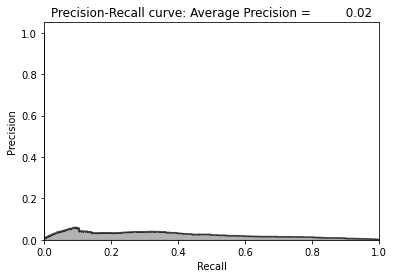

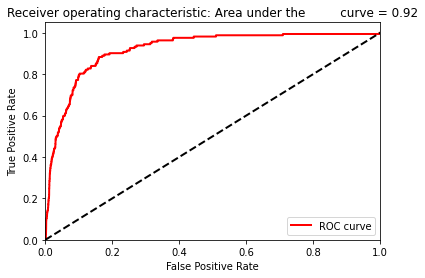

Epoch 1/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.1263 - accuracy: 0.7924 - val_loss: 0.0366 - val_accuracy: 0.8787
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0378 - accuracy: 0.9150 - val_loss: 0.0351 - val_accuracy: 0.9087
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0364 - accuracy: 0.9130 - val_loss: 0.0349 - val_accuracy: 0.9245
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0356 - accuracy: 0.9377 - val_loss: 0.0373 - val_accuracy: 0.9244
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0359 - accuracy: 0.9508 - val_loss: 0.0343 - val_accuracy: 0.9454
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0353 - accuracy: 0.9541 - val_loss: 0.0342 - val_accuracy: 0.9673
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0353 - accuracy: 0.9620 - val_loss: 0.0339 - val_ac

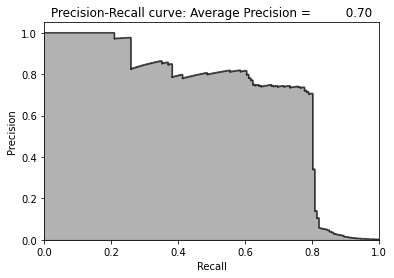

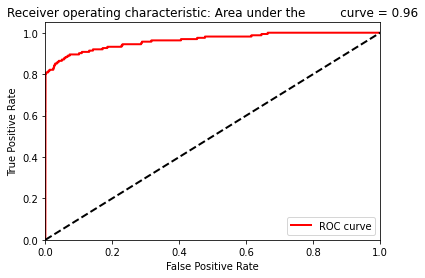

Epoch 1/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.1096 - accuracy: 0.7693 - val_loss: 0.0369 - val_accuracy: 0.8616
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0393 - accuracy: 0.9215 - val_loss: 0.0371 - val_accuracy: 0.9580
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0391 - accuracy: 0.9578 - val_loss: 0.0376 - val_accuracy: 0.9461
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0386 - accuracy: 0.9580 - val_loss: 0.0383 - val_accuracy: 0.9579
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0393 - accuracy: 0.9576 - val_loss: 0.0379 - val_accuracy: 0.9566
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0386 - accuracy: 0.9583 - val_loss: 0.0367 - val_accuracy: 0.9662
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0394 - accuracy: 0.9602 - val_loss: 0.0366 - val_ac

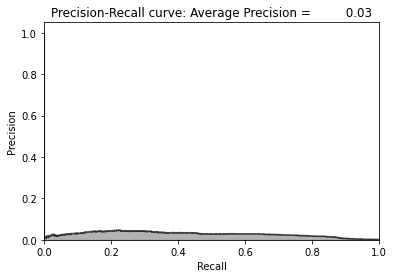

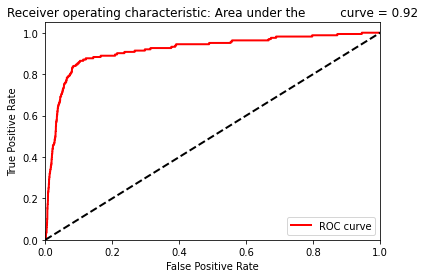

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.1254 - accuracy: 0.8149 - val_loss: 0.0399 - val_accuracy: 0.9016
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0392 - accuracy: 0.9211 - val_loss: 0.0366 - val_accuracy: 0.9355
Epoch 3/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0384 - accuracy: 0.9217 - val_loss: 0.0363 - val_accuracy: 0.9427
Epoch 4/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0382 - accuracy: 0.9478 - val_loss: 0.0365 - val_accuracy: 0.9633
Epoch 5/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0395 - accuracy: 0.9610 - val_loss: 0.0368 - val_accuracy: 0.9658
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0386 - accuracy: 0.9630 - val_loss: 0.0475 - val_accuracy: 0.9168
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0383 - accuracy: 0.9512 - val_loss: 0.0366 - val_ac

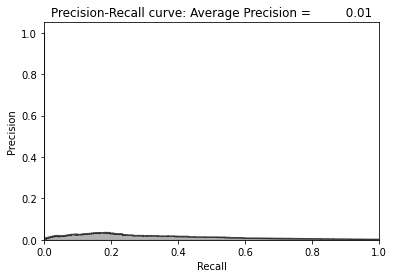

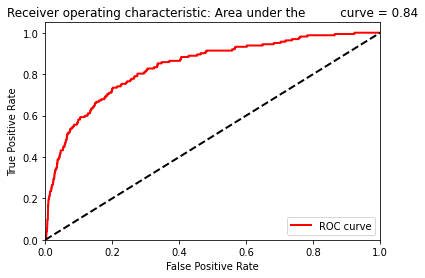

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.1030 - accuracy: 0.8054 - val_loss: 0.0365 - val_accuracy: 0.8646
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0410 - accuracy: 0.9106 - val_loss: 0.0366 - val_accuracy: 0.9262
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0395 - accuracy: 0.9454 - val_loss: 0.0367 - val_accuracy: 0.9556
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0397 - accuracy: 0.9575 - val_loss: 0.0370 - val_accuracy: 0.9622
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0386 - accuracy: 0.9573 - val_loss: 0.0374 - val_accuracy: 0.9601
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0394 - accuracy: 0.9582 - val_loss: 0.0377 - val_accuracy: 0.9492
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0390 - accuracy: 0.9570 - val_loss: 0.0368 - val_ac

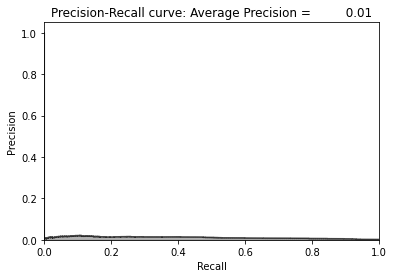

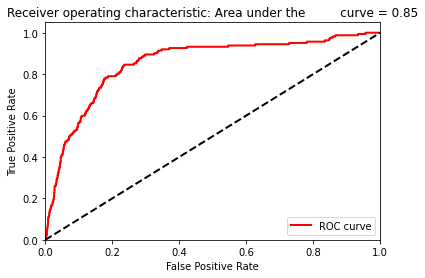

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.1243 - accuracy: 0.8420 - val_loss: 0.0367 - val_accuracy: 0.9383
Epoch 2/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0384 - accuracy: 0.9333 - val_loss: 0.0364 - val_accuracy: 0.9460
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0385 - accuracy: 0.9404 - val_loss: 0.0379 - val_accuracy: 0.9546
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0389 - accuracy: 0.9568 - val_loss: 0.0370 - val_accuracy: 0.9676
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0386 - accuracy: 0.9654 - val_loss: 0.0366 - val_accuracy: 0.9675
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0390 - accuracy: 0.9535 - val_loss: 0.0372 - val_accuracy: 0.9591
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0387 - accuracy: 0.9593 - val_loss: 0.0382 - val_ac

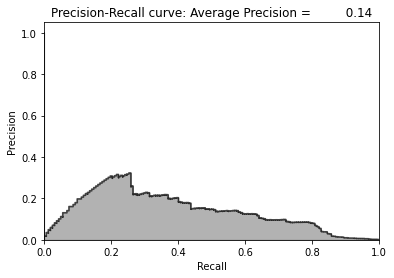

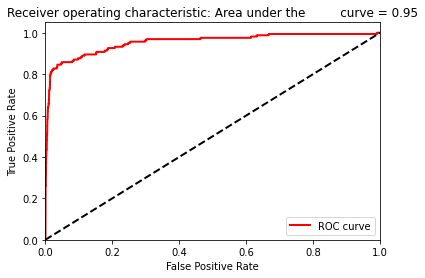

Epoch 1/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.1213 - accuracy: 0.8212 - val_loss: 0.0366 - val_accuracy: 0.9294
Epoch 2/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0418 - accuracy: 0.9427 - val_loss: 0.0369 - val_accuracy: 0.9510
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0385 - accuracy: 0.9552 - val_loss: 0.0362 - val_accuracy: 0.9592
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0393 - accuracy: 0.9555 - val_loss: 0.0364 - val_accuracy: 0.9587
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0391 - accuracy: 0.9568 - val_loss: 0.0366 - val_accuracy: 0.9513
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0383 - accuracy: 0.9557 - val_loss: 0.0366 - val_accuracy: 0.9595
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0385 - accuracy: 0.9570 - val_loss: 0.0366 - val_ac

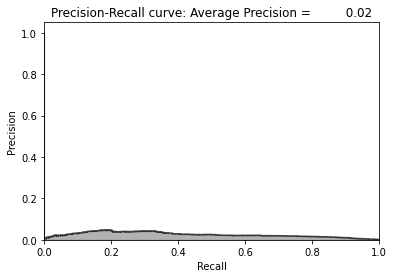

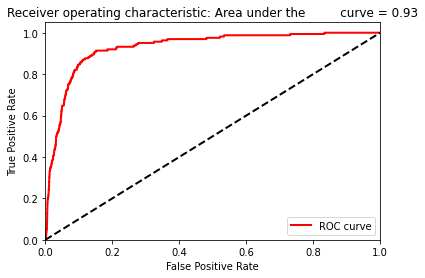

Epoch 1/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.1043 - accuracy: 0.8421 - val_loss: 0.0362 - val_accuracy: 0.9115
Epoch 2/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0377 - accuracy: 0.9255 - val_loss: 0.0343 - val_accuracy: 0.9471
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0355 - accuracy: 0.9551 - val_loss: 0.0355 - val_accuracy: 0.9518
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0352 - accuracy: 0.9634 - val_loss: 0.0345 - val_accuracy: 0.9442
Epoch 5/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0355 - accuracy: 0.9530 - val_loss: 0.0344 - val_accuracy: 0.9503
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0354 - accuracy: 0.9564 - val_loss: 0.0341 - val_accuracy: 0.9665
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0353 - accuracy: 0.9619 - val_loss: 0.0341 - val_ac

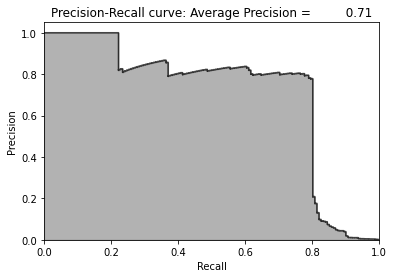

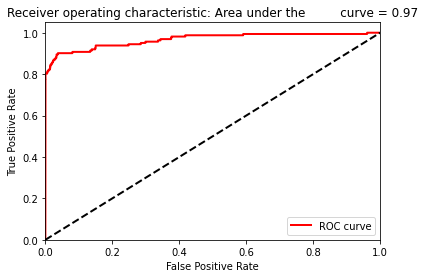

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.1064 - accuracy: 0.7886 - val_loss: 0.0372 - val_accuracy: 0.8492
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0403 - accuracy: 0.8634 - val_loss: 0.0362 - val_accuracy: 0.8829
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0403 - accuracy: 0.9134 - val_loss: 0.0367 - val_accuracy: 0.9115
Epoch 4/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0393 - accuracy: 0.9168 - val_loss: 0.0393 - val_accuracy: 0.9179
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0396 - accuracy: 0.9329 - val_loss: 0.0367 - val_accuracy: 0.9436
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0391 - accuracy: 0.9476 - val_loss: 0.0369 - val_accuracy: 0.9453
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0384 - accuracy: 0.9523 - val_loss: 0.0369 - val_ac

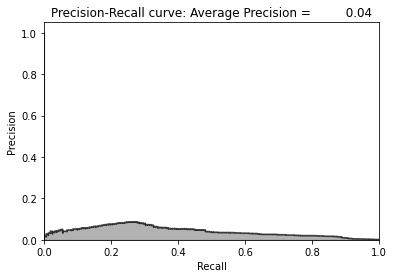

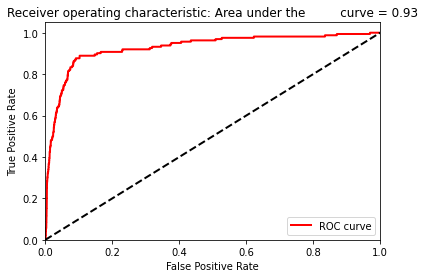

Epoch 1/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.1054 - accuracy: 0.8191 - val_loss: 0.0350 - val_accuracy: 0.8955
Epoch 2/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0367 - accuracy: 0.9191 - val_loss: 0.0342 - val_accuracy: 0.9358
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0352 - accuracy: 0.9376 - val_loss: 0.0355 - val_accuracy: 0.9350
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0352 - accuracy: 0.9587 - val_loss: 0.0346 - val_accuracy: 0.9360
Epoch 5/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0363 - accuracy: 0.9389 - val_loss: 0.0343 - val_accuracy: 0.9479
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0343 - accuracy: 0.9572 - val_loss: 0.0357 - val_accuracy: 0.9196
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0380 - accuracy: 0.9301 - val_loss: 0.0355 - val_ac

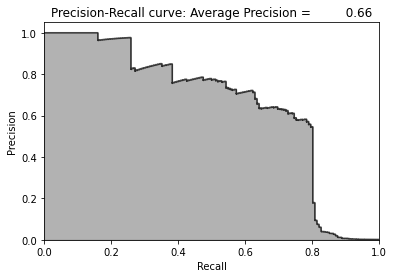

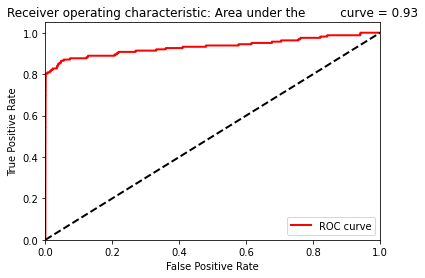

Mean average precision over 10 runs:  0.23391612759738703


[0.024287912184751605,
 0.6951072541052904,
 0.027223642714446335,
 0.013764536390347932,
 0.010910683355189896,
 0.13896699074696137,
 0.02489409747786542,
 0.706342592743341,
 0.04063427058409637,
 0.6570292956715804]

In [ ]:
# 모델 2 v2
# 선형 활성화 함수를 가진 2-계층 과소완전 오토인코더(은닉층 27개 노드)
# 10번 실행 - 평균 정밀도의 평균 계산
test_scores = []
for i in range(0,10):
    # 신경망 API 호출
    model = Sequential()

    # 입력층에 선형 활성화 함수 적용
    # 27개 노드를 가진 은닉층 생성
    model.add(Dense(units=27, activation='linear',input_dim=29))

    # 은닉층에 선형 활성화 함수 적용
    # 29개 노드를 가진 출력층 생성
    model.add(Dense(units=29, activation='linear'))

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # 모델 훈련
    num_epochs = 10
    batch_size = 32

    history = model.fit(x=X_train_AE, y=X_train_AE,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_train_AE, X_train_AE),
                        verbose=1)

    # 테스트 셋에 대한 평가
    predictions = model.predict(X_test, verbose=1)
    anomalyScoresAE = anomalyScores(X_test, predictions)
    preds, avgPrecision = plotResults(y_test, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    model.reset_states()

print("Mean average precision over 10 runs: ", np.mean(test_scores))
test_scores

In [ ]:
# 결과
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores

Mean average precision over 10 runs:  0.23391612759738703
Coefficient of variation over 10 runs:  1.275248582933108


[0.024287912184751605,
 0.6951072541052904,
 0.027223642714446335,
 0.013764536390347932,
 0.010910683355189896,
 0.13896699074696137,
 0.02489409747786542,
 0.706342592743341,
 0.04063427058409637,
 0.6570292956715804]

노드의 수를 늘린 2-계층 과소완전 오토인코더를 사용한 훈련 손실의 결과이다.

20개가 아닌 27개로 노드의 수를 늘린 과소완전 오토인코더이다

평균 정밀도는 0.23 , 변동계수는 1.27이나, 대체적으로 노드의 수를 증가시키면 평균 정밀도가 향상된다고 한다.

이번 결과는 예외적으로 평균 정밀도가 낮아지는 성능이 초래되었다.





### 과소완전 오토인코더 - 은닉층 증가하기

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.1224 - accuracy: 0.8100 - val_loss: 0.0363 - val_accuracy: 0.9079
Epoch 2/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0405 - accuracy: 0.9156 - val_loss: 0.0355 - val_accuracy: 0.9260
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0398 - accuracy: 0.9301 - val_loss: 0.0357 - val_accuracy: 0.9157
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0372 - accuracy: 0.9184 - val_loss: 0.0349 - val_accuracy: 0.9308
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0365 - accuracy: 0.9493 - val_loss: 0.0346 - val_accuracy: 0.9371
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0361 - accuracy: 0.9441 - val_loss: 0.0348 - val_accuracy: 0.9320
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0359 - accuracy: 0.9444 - val_loss: 0.0343 - val_ac

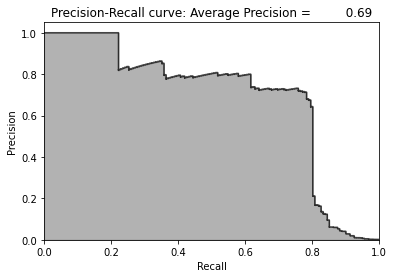

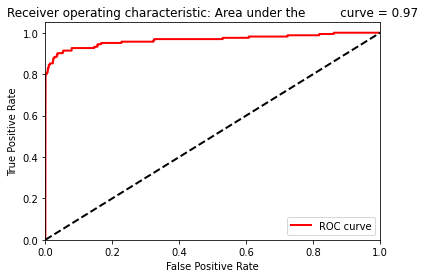

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.1315 - accuracy: 0.7568 - val_loss: 0.0370 - val_accuracy: 0.8291
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0390 - accuracy: 0.8506 - val_loss: 0.0363 - val_accuracy: 0.8358
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0414 - accuracy: 0.8860 - val_loss: 0.0356 - val_accuracy: 0.9019
Epoch 4/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0392 - accuracy: 0.9197 - val_loss: 0.0356 - val_accuracy: 0.9453
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0380 - accuracy: 0.9479 - val_loss: 0.0367 - val_accuracy: 0.9410
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0391 - accuracy: 0.9482 - val_loss: 0.0353 - val_accuracy: 0.9496
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0379 - accuracy: 0.9440 - val_loss: 0.0348 - val_ac

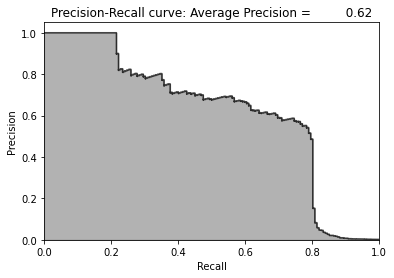

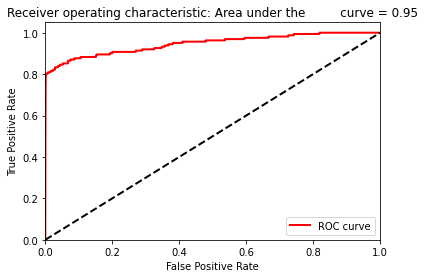

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.1063 - accuracy: 0.8207 - val_loss: 0.0366 - val_accuracy: 0.9033
Epoch 2/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0392 - accuracy: 0.9157 - val_loss: 0.0363 - val_accuracy: 0.9311
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0383 - accuracy: 0.9273 - val_loss: 0.0357 - val_accuracy: 0.9391
Epoch 4/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0379 - accuracy: 0.9385 - val_loss: 0.0361 - val_accuracy: 0.9449
Epoch 5/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0378 - accuracy: 0.9425 - val_loss: 0.0359 - val_accuracy: 0.9587
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0377 - accuracy: 0.9524 - val_loss: 0.0373 - val_accuracy: 0.9512
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0377 - accuracy: 0.9513 - val_loss: 0.0369 - val_ac

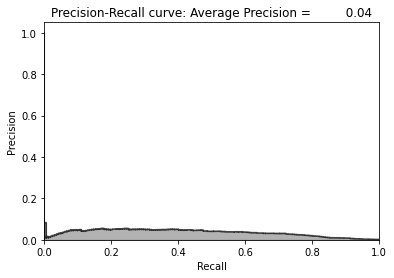

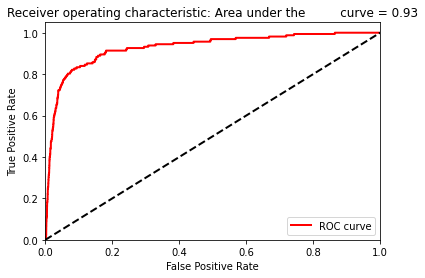

Epoch 1/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.1073 - accuracy: 0.8388 - val_loss: 0.0390 - val_accuracy: 0.9120
Epoch 2/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0403 - accuracy: 0.9388 - val_loss: 0.0376 - val_accuracy: 0.9481
Epoch 3/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.0398 - accuracy: 0.9496 - val_loss: 0.0378 - val_accuracy: 0.9624
Epoch 4/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0396 - accuracy: 0.9580 - val_loss: 0.0370 - val_accuracy: 0.9655
Epoch 5/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0393 - accuracy: 0.9616 - val_loss: 0.0372 - val_accuracy: 0.9580
Epoch 6/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0397 - accuracy: 0.9607 - val_loss: 0.0371 - val_accuracy: 0.9657
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0395 - accuracy: 0.9548 - val_loss: 0.0370 - val_ac

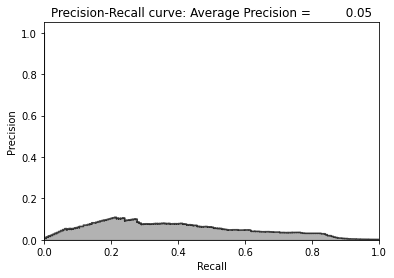

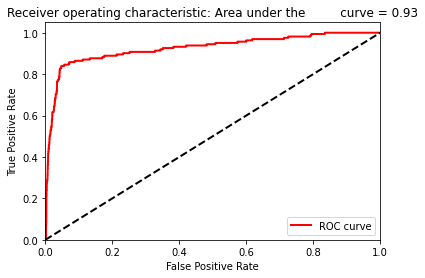

Epoch 1/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.1170 - accuracy: 0.7998 - val_loss: 0.0361 - val_accuracy: 0.8739
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0400 - accuracy: 0.8777 - val_loss: 0.0358 - val_accuracy: 0.8944
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0368 - accuracy: 0.9091 - val_loss: 0.0356 - val_accuracy: 0.9345
Epoch 4/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0399 - accuracy: 0.9466 - val_loss: 0.0355 - val_accuracy: 0.9493
Epoch 5/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0372 - accuracy: 0.9470 - val_loss: 0.0340 - val_accuracy: 0.9461
Epoch 6/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0370 - accuracy: 0.9534 - val_loss: 0.0339 - val_accuracy: 0.9472
Epoch 7/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0360 - accuracy: 0.9506 - val_loss: 0.0361 - val_ac

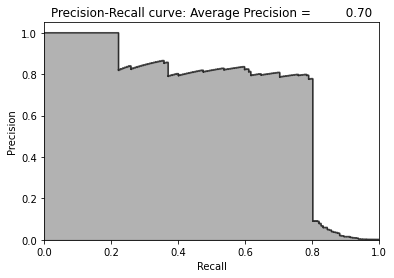

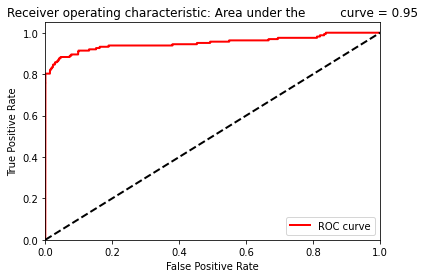

Epoch 1/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.1574 - accuracy: 0.7628 - val_loss: 0.0366 - val_accuracy: 0.9200
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0397 - accuracy: 0.9275 - val_loss: 0.0375 - val_accuracy: 0.9325
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0384 - accuracy: 0.9257 - val_loss: 0.0369 - val_accuracy: 0.9396
Epoch 4/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0365 - accuracy: 0.9496 - val_loss: 0.0351 - val_accuracy: 0.9695
Epoch 5/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0364 - accuracy: 0.9557 - val_loss: 0.0339 - val_accuracy: 0.9700
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0358 - accuracy: 0.9532 - val_loss: 0.0345 - val_accuracy: 0.9741
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0359 - accuracy: 0.9502 - val_loss: 0.0338 - val_ac

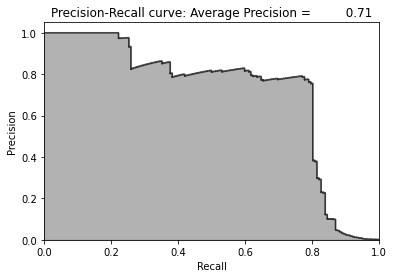

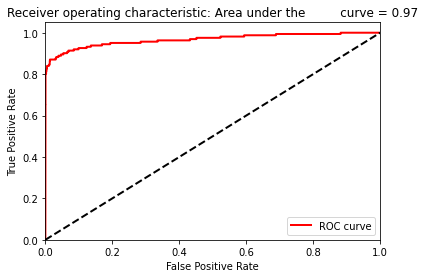

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.1273 - accuracy: 0.7742 - val_loss: 0.0364 - val_accuracy: 0.8513
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0418 - accuracy: 0.8787 - val_loss: 0.0363 - val_accuracy: 0.9065
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0395 - accuracy: 0.9124 - val_loss: 0.0392 - val_accuracy: 0.9245
Epoch 4/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0395 - accuracy: 0.9260 - val_loss: 0.0361 - val_accuracy: 0.9294
Epoch 5/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0404 - accuracy: 0.9387 - val_loss: 0.0366 - val_accuracy: 0.9419
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0399 - accuracy: 0.9501 - val_loss: 0.0524 - val_accuracy: 0.9041
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0390 - accuracy: 0.9484 - val_loss: 0.0387 - val_ac

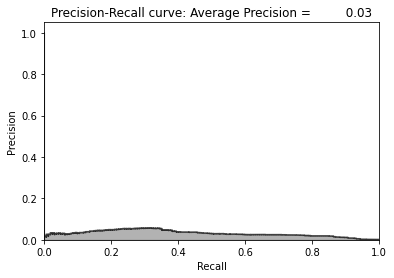

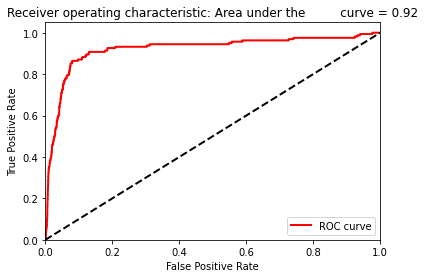

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.1403 - accuracy: 0.7844 - val_loss: 0.0371 - val_accuracy: 0.8967
Epoch 2/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0385 - accuracy: 0.9036 - val_loss: 0.0365 - val_accuracy: 0.9158
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0380 - accuracy: 0.9221 - val_loss: 0.0345 - val_accuracy: 0.9293
Epoch 4/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0366 - accuracy: 0.9435 - val_loss: 0.0342 - val_accuracy: 0.9409
Epoch 5/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0357 - accuracy: 0.9508 - val_loss: 0.0340 - val_accuracy: 0.9609
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0358 - accuracy: 0.9527 - val_loss: 0.0338 - val_accuracy: 0.9689
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0358 - accuracy: 0.9561 - val_loss: 0.0349 - val_ac

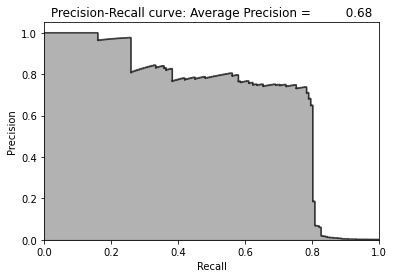

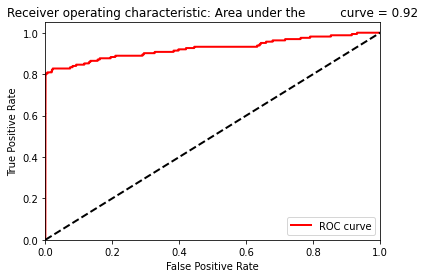

Epoch 1/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.1237 - accuracy: 0.8238 - val_loss: 0.0371 - val_accuracy: 0.9295
Epoch 2/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0405 - accuracy: 0.9449 - val_loss: 0.0376 - val_accuracy: 0.9565
Epoch 3/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.0402 - accuracy: 0.9514 - val_loss: 0.0366 - val_accuracy: 0.9643
Epoch 4/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0398 - accuracy: 0.9588 - val_loss: 0.0365 - val_accuracy: 0.9598
Epoch 5/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0393 - accuracy: 0.9554 - val_loss: 0.0366 - val_accuracy: 0.9546
Epoch 6/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.0396 - accuracy: 0.9532 - val_loss: 0.0368 - val_accuracy: 0.9590
Epoch 7/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.0393 - accuracy: 0.9550 - val_loss: 0.0372 - val_ac

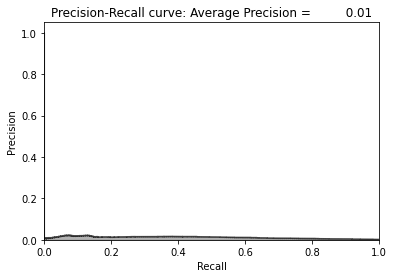

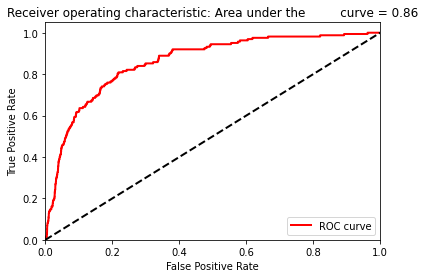

Epoch 1/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.1244 - accuracy: 0.7883 - val_loss: 0.0375 - val_accuracy: 0.8840
Epoch 2/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.0391 - accuracy: 0.8905 - val_loss: 0.0370 - val_accuracy: 0.9078
Epoch 3/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.0407 - accuracy: 0.9347 - val_loss: 0.0371 - val_accuracy: 0.9489
Epoch 4/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0394 - accuracy: 0.9492 - val_loss: 0.0371 - val_accuracy: 0.9578
Epoch 5/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0399 - accuracy: 0.9531 - val_loss: 0.0365 - val_accuracy: 0.9636
Epoch 6/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0398 - accuracy: 0.9597 - val_loss: 0.0404 - val_accuracy: 0.9451
Epoch 7/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0387 - accuracy: 0.9501 - val_loss: 0.0370 - val_ac

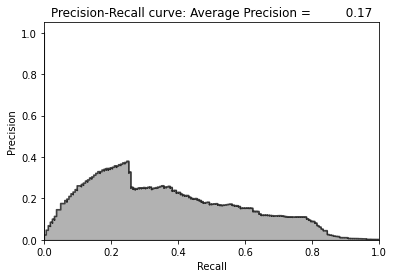

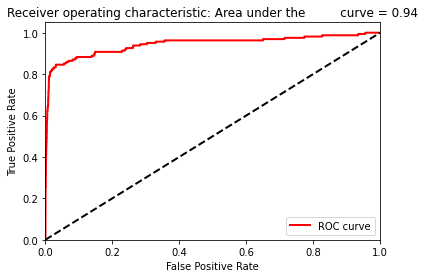

Mean average precision over 10 runs:  0.3706030229871952


[0.6871155235998961,
 0.6234114734669659,
 0.035099766132483674,
 0.051676426646447934,
 0.7020971832796943,
 0.7137719447922592,
 0.031111432517385896,
 0.6829638976074992,
 0.011553861639958035,
 0.16722872018936144]

In [ ]:
# 모델 3
# 선형 활성화 함수로 구성된 3-계층 과소완전 오토인코더(2개 은닉층에 각각 28개 노드, 27개 노드)
# 2개 은닉층에 각각 28개 노드, 27개 노드
# 10번 실행 - 평균 정밀도의 평균 계산
test_scores = []
for i in range(0,10):
    # 신경망 API 호출
    model = Sequential()

    # 입력층에 선형 활성화 함수 적용
    # 27개 노드를 가진 첫번째 은닉층 생성
    # 28개 노드를 가진 두번째 은닉층 생성
    model.add(Dense(units=28, activation='linear',input_dim=29))
    model.add(Dense(units=27, activation='linear'))

    # 두번째 은닉층에 선형 활성화 함수 적용
    # 29개 노드를 가진 출력층 생성
    model.add(Dense(units=29, activation='linear'))

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # 모델 훈련
    num_epochs = 10
    batch_size = 32

    history = model.fit(x=X_train_AE, y=X_train_AE,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_train_AE, X_train_AE),
                        verbose=1)

    # 테스트 셋에 대한 평가
    predictions = model.predict(X_test, verbose=1)
    anomalyScoresAE = anomalyScores(X_test, predictions)
    preds, avgPrecision = plotResults(y_test, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    model.reset_states()

print("Mean average precision over 10 runs: ", np.mean(test_scores))
test_scores

In [ ]:
# 결과
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores

Mean average precision over 10 runs:  0.3706030229871952
Coefficient of variation over 10 runs:  0.8486259119206098


[0.6871155235998961,
 0.6234114734669659,
 0.035099766132483674,
 0.051676426646447934,
 0.7020971832796943,
 0.7137719447922592,
 0.031111432517385896,
 0.6829638976074992,
 0.011553861639958035,
 0.16722872018936144]

이번에는 오토인코더에 은닉층을 추가해 결과를 향상시킬 수 있는지 살펴보겠다. 선형 활성화 함수를 계속하여 사용했다.

이렇게 노드 수를 늘리거나 은닉층을 증가하여 최적의 오토인코더 값을 찾는 것은 매우 중요하다.

솔루션 성능을 개선하기 위한 탐색의 일부로, 신경망 및 하이퍼 파라미터를 수정하는 방법을 알아야한다.



여기서 평균 정밀도의 평균은 0.37, 변동 계수는 0.84로 나타났다.

변동 계수가 높은 편이므로, 다른 방향으로 파라미터를 수정할 필요가 있다.


### 비선형 오토인코더 

비선형 활성화 함술르 사용하여 과소완전 오토인코더를 구축하겠다.

여기서 비선형 활성화 함수로 ReLu을 사용하였다.



Epoch 1/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.6899 - accuracy: 0.6260 - val_loss: 0.6309 - val_accuracy: 0.7553
Epoch 2/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.6242 - accuracy: 0.7700 - val_loss: 0.6177 - val_accuracy: 0.7723
Epoch 3/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.6160 - accuracy: 0.7942 - val_loss: 0.6121 - val_accuracy: 0.8108
Epoch 4/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.6085 - accuracy: 0.7964 - val_loss: 0.6087 - val_accuracy: 0.7544
Epoch 5/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.5999 - accuracy: 0.8027 - val_loss: 0.5976 - val_accuracy: 0.8020
Epoch 6/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.5992 - accuracy: 0.8052 - val_loss: 0.5952 - val_accuracy: 0.8236
Epoch 7/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.5967 - accuracy: 0.8154 - val_loss: 0.5942 - val_ac

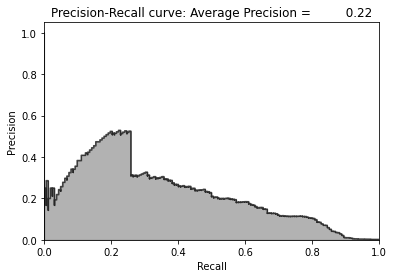

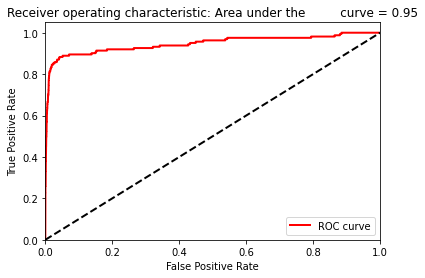

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.7081 - accuracy: 0.5494 - val_loss: 0.6538 - val_accuracy: 0.6585
Epoch 2/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.6463 - accuracy: 0.6766 - val_loss: 0.6395 - val_accuracy: 0.6758
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.6423 - accuracy: 0.7007 - val_loss: 0.6415 - val_accuracy: 0.7107
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.6330 - accuracy: 0.7273 - val_loss: 0.6238 - val_accuracy: 0.7488
Epoch 5/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.6264 - accuracy: 0.7397 - val_loss: 0.6236 - val_accuracy: 0.7480
Epoch 6/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.6250 - accuracy: 0.7407 - val_loss: 0.6228 - val_accuracy: 0.7532
Epoch 7/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.6234 - accuracy: 0.7455 - val_loss: 0.6222 - val_ac

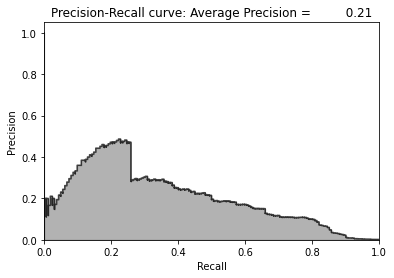

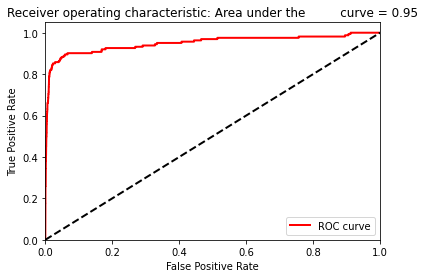

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.6679 - accuracy: 0.5624 - val_loss: 0.6160 - val_accuracy: 0.6733
Epoch 2/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.6080 - accuracy: 0.6875 - val_loss: 0.6067 - val_accuracy: 0.6961
Epoch 3/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.6061 - accuracy: 0.6963 - val_loss: 0.6034 - val_accuracy: 0.6889
Epoch 4/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.5948 - accuracy: 0.7174 - val_loss: 0.5928 - val_accuracy: 0.7221
Epoch 5/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.5958 - accuracy: 0.7170 - val_loss: 0.5909 - val_accuracy: 0.7345
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.5960 - accuracy: 0.7192 - val_loss: 0.5916 - val_accuracy: 0.7319
Epoch 7/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.5967 - accuracy: 0.7151 - val_loss: 0.6121 - val_ac

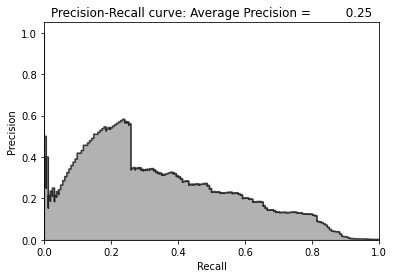

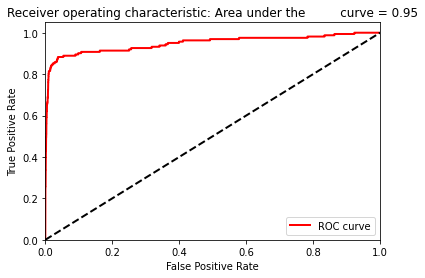

Epoch 1/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.6753 - accuracy: 0.6008 - val_loss: 0.6121 - val_accuracy: 0.7214
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.6028 - accuracy: 0.7407 - val_loss: 0.5932 - val_accuracy: 0.7564
Epoch 3/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.5906 - accuracy: 0.7687 - val_loss: 0.5852 - val_accuracy: 0.7881
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.5872 - accuracy: 0.7768 - val_loss: 0.5856 - val_accuracy: 0.7830
Epoch 5/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.5856 - accuracy: 0.7830 - val_loss: 0.6025 - val_accuracy: 0.6859
Epoch 6/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.5935 - accuracy: 0.7586 - val_loss: 0.5883 - val_accuracy: 0.7539
Epoch 7/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.5886 - accuracy: 0.7807 - val_loss: 0.5900 - val_ac

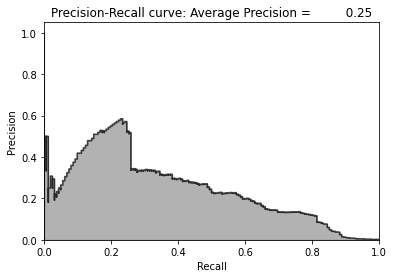

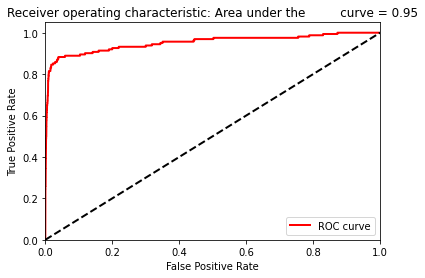

Epoch 1/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6835 - accuracy: 0.6417 - val_loss: 0.6238 - val_accuracy: 0.7752
Epoch 2/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6289 - accuracy: 0.7780 - val_loss: 0.6235 - val_accuracy: 0.8033
Epoch 3/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6223 - accuracy: 0.7940 - val_loss: 0.6157 - val_accuracy: 0.8117
Epoch 4/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.6164 - accuracy: 0.8094 - val_loss: 0.6136 - val_accuracy: 0.8287
Epoch 5/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6207 - accuracy: 0.8033 - val_loss: 0.6136 - val_accuracy: 0.8290
Epoch 6/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6149 - accuracy: 0.8160 - val_loss: 0.6138 - val_accuracy: 0.8174
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.6182 - accuracy: 0.8052 - val_loss: 0.6167 - val_ac

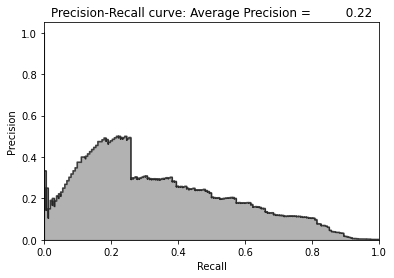

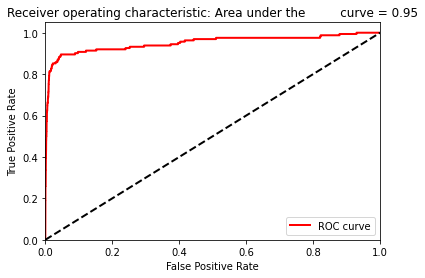

Epoch 1/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.6689 - accuracy: 0.6356 - val_loss: 0.6419 - val_accuracy: 0.6343
Epoch 2/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.5893 - accuracy: 0.8099 - val_loss: 0.5806 - val_accuracy: 0.8414
Epoch 3/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.5834 - accuracy: 0.8359 - val_loss: 0.5760 - val_accuracy: 0.8451
Epoch 4/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.5708 - accuracy: 0.8518 - val_loss: 0.5867 - val_accuracy: 0.8010
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.5834 - accuracy: 0.8563 - val_loss: 0.5923 - val_accuracy: 0.8658
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.5841 - accuracy: 0.8580 - val_loss: 0.5783 - val_accuracy: 0.8793
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.5812 - accuracy: 0.8584 - val_loss: 0.5805 - val_ac

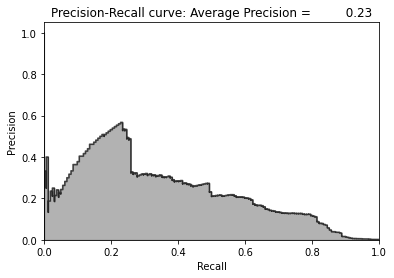

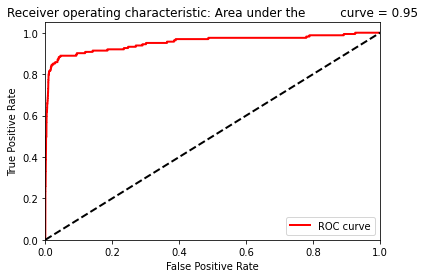

Epoch 1/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.6863 - accuracy: 0.6437 - val_loss: 0.6266 - val_accuracy: 0.7816
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.6170 - accuracy: 0.8074 - val_loss: 0.6078 - val_accuracy: 0.8336
Epoch 3/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.6087 - accuracy: 0.8304 - val_loss: 0.6040 - val_accuracy: 0.8459
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.6032 - accuracy: 0.8327 - val_loss: 0.5995 - val_accuracy: 0.8397
Epoch 5/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6017 - accuracy: 0.8410 - val_loss: 0.5971 - val_accuracy: 0.8591
Epoch 6/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6038 - accuracy: 0.8354 - val_loss: 0.6081 - val_accuracy: 0.8299
Epoch 7/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6050 - accuracy: 0.8313 - val_loss: 0.6020 - val_ac

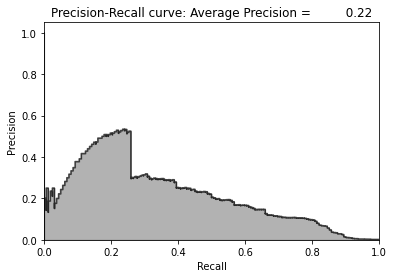

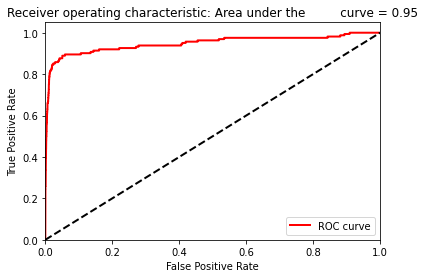

Epoch 1/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.6987 - accuracy: 0.6358 - val_loss: 0.6378 - val_accuracy: 0.7679
Epoch 2/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6278 - accuracy: 0.7961 - val_loss: 0.6190 - val_accuracy: 0.8226
Epoch 3/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.6196 - accuracy: 0.8248 - val_loss: 0.6160 - val_accuracy: 0.8403
Epoch 4/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.6175 - accuracy: 0.8307 - val_loss: 0.6365 - val_accuracy: 0.7616
Epoch 5/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6171 - accuracy: 0.8312 - val_loss: 0.6166 - val_accuracy: 0.8130
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.6166 - accuracy: 0.8333 - val_loss: 0.6143 - val_accuracy: 0.8340
Epoch 7/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.6158 - accuracy: 0.8384 - val_loss: 0.6410 - val_ac

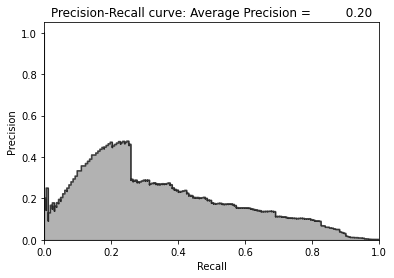

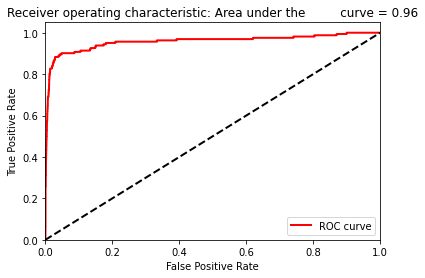

Epoch 1/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.7266 - accuracy: 0.5421 - val_loss: 0.6751 - val_accuracy: 0.6399
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.6544 - accuracy: 0.6600 - val_loss: 0.6439 - val_accuracy: 0.6644
Epoch 3/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.6440 - accuracy: 0.6837 - val_loss: 0.6414 - val_accuracy: 0.6651
Epoch 4/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6377 - accuracy: 0.6928 - val_loss: 0.6350 - val_accuracy: 0.7046
Epoch 5/10
5964/5964 [==============================] - 26s 4ms/step - loss: 0.6401 - accuracy: 0.6895 - val_loss: 0.6421 - val_accuracy: 0.6819
Epoch 6/10
5964/5964 [==============================] - 25s 4ms/step - loss: 0.6359 - accuracy: 0.6989 - val_loss: 0.6360 - val_accuracy: 0.6832
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.6343 - accuracy: 0.6996 - val_loss: 0.6333 - val_ac

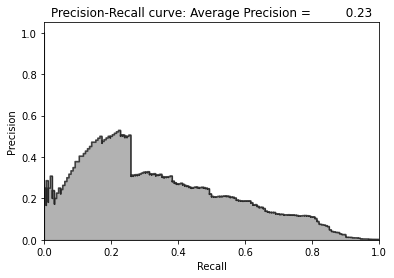

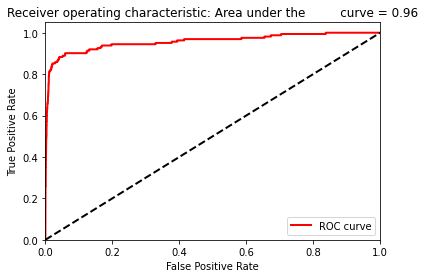

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.6817 - accuracy: 0.6310 - val_loss: 0.6219 - val_accuracy: 0.7607
Epoch 2/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.6136 - accuracy: 0.7888 - val_loss: 0.6068 - val_accuracy: 0.8143
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.6076 - accuracy: 0.8084 - val_loss: 0.6072 - val_accuracy: 0.7829
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.6049 - accuracy: 0.7973 - val_loss: 0.6210 - val_accuracy: 0.7799
Epoch 5/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.6064 - accuracy: 0.7883 - val_loss: 0.6033 - val_accuracy: 0.7846
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.6026 - accuracy: 0.7966 - val_loss: 0.6047 - val_accuracy: 0.7701
Epoch 7/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.6031 - accuracy: 0.7957 - val_loss: 0.6005 - val_ac

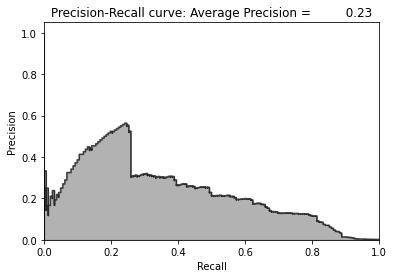

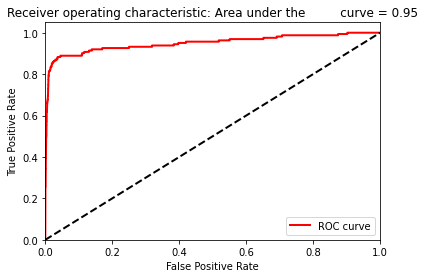

Mean average precision over 10 runs:  0.22537073791771917


[0.22328387030213848,
 0.20739860297291332,
 0.247385779575902,
 0.24716717085536663,
 0.21736001484417658,
 0.2343755584771761,
 0.21849024170668718,
 0.19877014959112455,
 0.22774634043642764,
 0.23172965041527885]

In [ ]:
# 모델 4
# ReLu 활성화 함수를 가진 4-계층 과소완전 오토인코더(4개의 은닉층에 각각 27개 노드,22개 노드,27개 노드,29개 노드)
# 10번 실행 - 평균 정밀도의 평균 계산
test_scores = []
for i in range(0,10):
    # 신경망 API 호출
    model = Sequential()

    # 전체적으로 ReLu 활성화 함수 적용
    # 27개 노드를 가진 첫번째 은닉층 생성
    # 22개 노드를 가진 두번째 은닉층 생성
    model.add(Dense(units=27, activation='relu',input_dim=29))
    model.add(Dense(units=22, activation='relu'))

    # 전체적으로 ReLu 활성화 함수 적용
    # 27개 노드를 가진 세번째 은닉층 생성
    # 29개 노드를 가진 네번째 은닉층 생성
    model.add(Dense(units=27, activation='relu'))
    model.add(Dense(units=29, activation='relu'))

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # 훈련 모델
    num_epochs = 10
    batch_size = 32

    history = model.fit(x=X_train_AE, y=X_train_AE,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_train_AE, X_train_AE),
                        verbose=1)

    # 테스트 셋에 대한 평가
    predictions = model.predict(X_test, verbose=1)
    anomalyScoresAE = anomalyScores(X_test, predictions)
    preds, avgPrecision = plotResults(y_test, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    model.reset_states()

print("Mean average precision over 10 runs: ", np.mean(test_scores))
test_scores

In [ ]:
# 결과
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores

Mean average precision over 10 runs:  0.22537073791771917
Coefficient of variation over 10 runs:  0.06631056980596696


[0.22328387030213848,
 0.20739860297291332,
 0.247385779575902,
 0.24716717085536663,
 0.21736001484417658,
 0.2343755584771761,
 0.21849024170668718,
 0.19877014959112455,
 0.22774634043642764,
 0.23172965041527885]

10번 실행한 평균 정밀도 분포이다.

평균 정밀도의 평균은 0.22, 변동 계수는 0.06으로 간다한 오토인코더의 결과보다 훨씬 안좋다.

이 데이터셋은 선형적이고 과소완전 오토인코더가 최상의 솔루션일 수 있으나, 하이퍼 파라미터 최적화를 통해 최적의 솔루션을 찾을 필요가 있다.

### 선형 활성화 함수를 가진 과대완전 오토인코더

과대완전 오토인코더는 은닉층이 입력층 또는 출력층보다 노드가 더 많다.

신경망 모델의 수용력이 높아 오토인코더는 훈련하는 관측치를 단순히 기억한다.

즉, 훈련 데이터를 과대 적합하게 될 것이며 미흡한 성과를 낼 것이다.


Epoch 1/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.0453 - accuracy: 0.9459 - val_loss: 3.2243e-06 - val_accuracy: 0.9993
Epoch 2/10
5964/5964 [==============================] - 16s 3ms/step - loss: 0.0013 - accuracy: 0.9924 - val_loss: 1.1123e-06 - val_accuracy: 0.9997
Epoch 3/10
5964/5964 [==============================] - 20s 3ms/step - loss: 0.0014 - accuracy: 0.9928 - val_loss: 9.4342e-05 - val_accuracy: 0.9952
Epoch 4/10
5964/5964 [==============================] - 17s 3ms/step - loss: 8.2743e-04 - accuracy: 0.9932 - val_loss: 4.3485e-05 - val_accuracy: 0.9951
Epoch 5/10
5964/5964 [==============================] - 21s 3ms/step - loss: 7.3384e-04 - accuracy: 0.9940 - val_loss: 3.1318e-04 - val_accuracy: 0.9944
Epoch 6/10
5964/5964 [==============================] - 20s 3ms/step - loss: 8.1617e-04 - accuracy: 0.9929 - val_loss: 1.5710e-04 - val_accuracy: 0.9958
Epoch 7/10
5964/5964 [==============================] - 21s 3ms/step - loss: 6.5718e-04 - accu

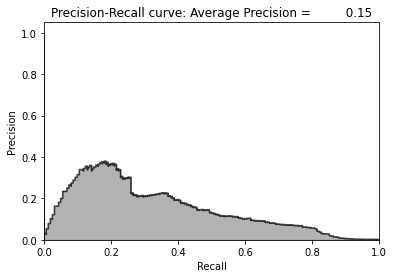

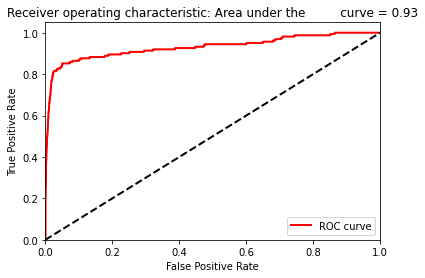

Epoch 1/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.0536 - accuracy: 0.9348 - val_loss: 0.0010 - val_accuracy: 0.9948
Epoch 2/10
5964/5964 [==============================] - 21s 3ms/step - loss: 0.0011 - accuracy: 0.9938 - val_loss: 5.3064e-08 - val_accuracy: 0.9999
Epoch 3/10
5964/5964 [==============================] - 17s 3ms/step - loss: 8.6775e-04 - accuracy: 0.9929 - val_loss: 3.6220e-05 - val_accuracy: 0.9966
Epoch 4/10
5964/5964 [==============================] - 17s 3ms/step - loss: 7.0084e-04 - accuracy: 0.9932 - val_loss: 1.3962e-05 - val_accuracy: 0.9982
Epoch 5/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.2181e-04 - accuracy: 0.9927 - val_loss: 5.3833e-06 - val_accuracy: 0.9989
Epoch 6/10
5964/5964 [==============================] - 16s 3ms/step - loss: 7.9221e-04 - accuracy: 0.9945 - val_loss: 0.0054 - val_accuracy: 0.9796
Epoch 7/10
5964/5964 [==============================] - 21s 4ms/step - loss: 5.3704e-04 - accuracy

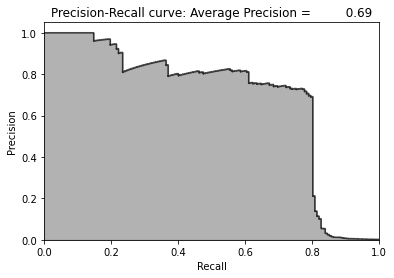

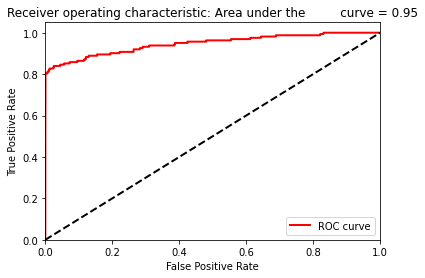

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0534 - accuracy: 0.9326 - val_loss: 0.0011 - val_accuracy: 0.9856
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0010 - accuracy: 0.9938 - val_loss: 3.2713e-07 - val_accuracy: 0.9997
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.2139e-04 - accuracy: 0.9938 - val_loss: 8.3203e-04 - val_accuracy: 0.9900
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 6.2541e-04 - accuracy: 0.9948 - val_loss: 4.3645e-06 - val_accuracy: 0.9990
Epoch 5/10
5964/5964 [==============================] - 20s 3ms/step - loss: 8.3208e-04 - accuracy: 0.9920 - val_loss: 4.8116e-06 - val_accuracy: 0.9990
Epoch 6/10
5964/5964 [==============================] - 22s 4ms/step - loss: 8.7977e-04 - accuracy: 0.9927 - val_loss: 2.8008e-06 - val_accuracy: 0.9995
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 6.3955e-04 - accu

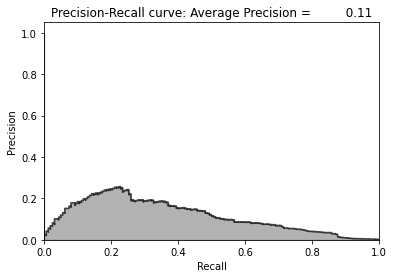

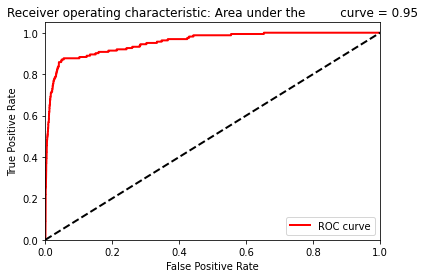

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0493 - accuracy: 0.9360 - val_loss: 4.8779e-04 - val_accuracy: 0.9932
Epoch 2/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0012 - accuracy: 0.9923 - val_loss: 0.0016 - val_accuracy: 0.9854
Epoch 3/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.1335e-04 - accuracy: 0.9927 - val_loss: 3.4283e-04 - val_accuracy: 0.9916
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0011 - accuracy: 0.9924 - val_loss: 5.0547e-05 - val_accuracy: 0.9953
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 9.0215e-04 - accuracy: 0.9926 - val_loss: 1.8380e-06 - val_accuracy: 0.9994
Epoch 6/10
5964/5964 [==============================] - 18s 3ms/step - loss: 7.7435e-04 - accuracy: 0.9946 - val_loss: 0.0094 - val_accuracy: 0.9599
Epoch 7/10
5964/5964 [==============================] - 18s 3ms/step - loss: 7.7461e-04 - accuracy: 0.

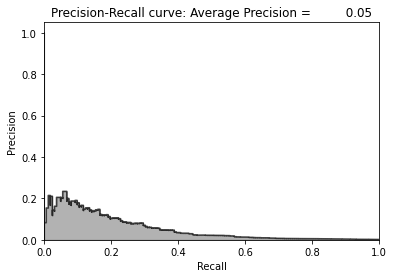

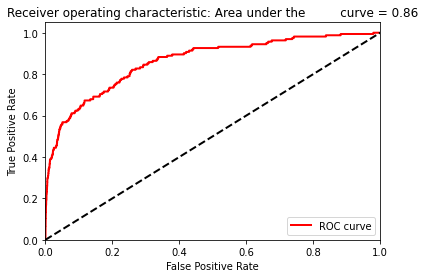

Epoch 1/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0512 - accuracy: 0.9351 - val_loss: 1.0364e-04 - val_accuracy: 0.9954
Epoch 2/10
5964/5964 [==============================] - 18s 3ms/step - loss: 0.0011 - accuracy: 0.9932 - val_loss: 0.0137 - val_accuracy: 0.9642
Epoch 3/10
5964/5964 [==============================] - 22s 4ms/step - loss: 9.6698e-04 - accuracy: 0.9930 - val_loss: 2.8337e-04 - val_accuracy: 0.9876
Epoch 4/10
5964/5964 [==============================] - 18s 3ms/step - loss: 8.5659e-04 - accuracy: 0.9936 - val_loss: 0.0025 - val_accuracy: 0.9747
Epoch 5/10
5964/5964 [==============================] - 22s 4ms/step - loss: 8.7608e-04 - accuracy: 0.9937 - val_loss: 1.2164e-04 - val_accuracy: 0.9953
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0010 - accuracy: 0.9921 - val_loss: 2.0951e-06 - val_accuracy: 0.9995
Epoch 7/10
5964/5964 [==============================] - 22s 4ms/step - loss: 8.4831e-04 - accuracy: 0.

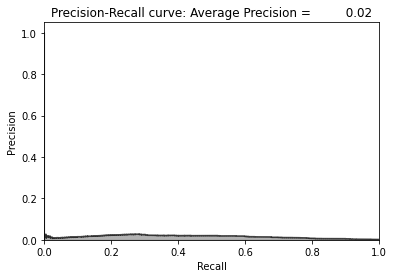

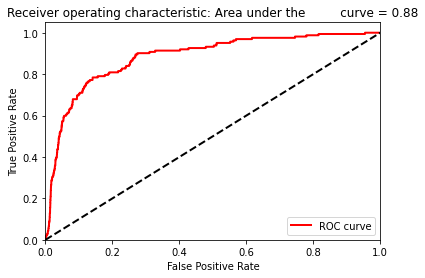

Epoch 1/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0457 - accuracy: 0.9363 - val_loss: 1.3602e-04 - val_accuracy: 0.9925
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0011 - accuracy: 0.9925 - val_loss: 5.8788e-08 - val_accuracy: 0.9999
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 8.1666e-04 - accuracy: 0.9930 - val_loss: 6.4920e-08 - val_accuracy: 0.9999
Epoch 4/10
5964/5964 [==============================] - 21s 4ms/step - loss: 8.5601e-04 - accuracy: 0.9929 - val_loss: 0.0021 - val_accuracy: 0.9814
Epoch 5/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0010 - accuracy: 0.9925 - val_loss: 1.4045e-05 - val_accuracy: 0.9991
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 6.0179e-04 - accuracy: 0.9931 - val_loss: 0.0011 - val_accuracy: 0.9933
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 5.5131e-04 - accuracy: 0.

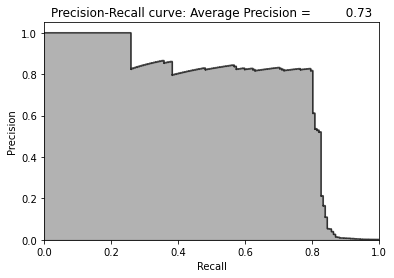

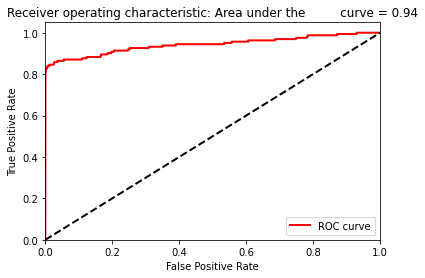

Epoch 1/10
5964/5964 [==============================] - 22s 4ms/step - loss: 0.0563 - accuracy: 0.9330 - val_loss: 4.3055e-05 - val_accuracy: 0.9980
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 9.9273e-04 - accuracy: 0.9927 - val_loss: 1.9271e-05 - val_accuracy: 0.9982
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 6.0939e-04 - accuracy: 0.9936 - val_loss: 0.0016 - val_accuracy: 0.9793
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0010 - accuracy: 0.9922 - val_loss: 7.5922e-05 - val_accuracy: 0.9975
Epoch 5/10
5964/5964 [==============================] - 23s 4ms/step - loss: 5.1304e-04 - accuracy: 0.9941 - val_loss: 8.3950e-04 - val_accuracy: 0.9887
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 9.3533e-04 - accuracy: 0.9923 - val_loss: 6.4165e-06 - val_accuracy: 0.9988
Epoch 7/10
5964/5964 [==============================] - 24s 4ms/step - loss: 6.9230e-04 - accu

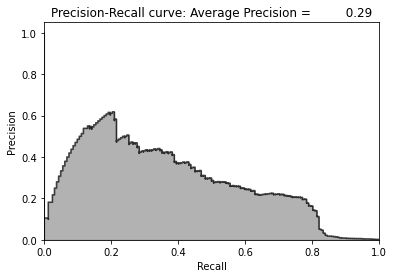

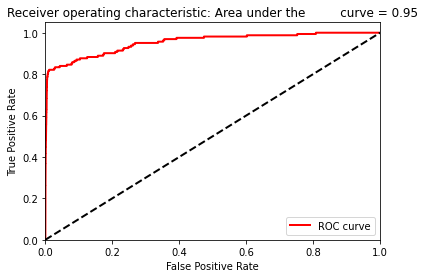

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0421 - accuracy: 0.9411 - val_loss: 1.0486e-04 - val_accuracy: 0.9976
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0010 - accuracy: 0.9922 - val_loss: 1.7704e-05 - val_accuracy: 0.9982
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 0.0012 - accuracy: 0.9935 - val_loss: 5.7117e-05 - val_accuracy: 0.9967
Epoch 4/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0010 - accuracy: 0.9924 - val_loss: 4.4443e-04 - val_accuracy: 0.9904
Epoch 5/10
5964/5964 [==============================] - 23s 4ms/step - loss: 7.1103e-04 - accuracy: 0.9944 - val_loss: 9.2224e-06 - val_accuracy: 0.9989
Epoch 6/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0016 - accuracy: 0.9943 - val_loss: 0.0124 - val_accuracy: 0.9861
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 6.5371e-04 - accuracy: 0.9935

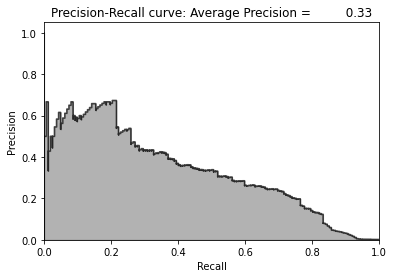

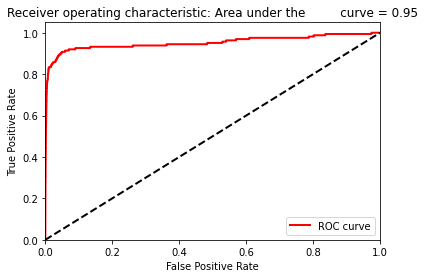

Epoch 1/10
5964/5964 [==============================] - 24s 4ms/step - loss: 0.0571 - accuracy: 0.9302 - val_loss: 5.1972e-05 - val_accuracy: 0.9969
Epoch 2/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0015 - accuracy: 0.9921 - val_loss: 3.3658e-04 - val_accuracy: 0.9911
Epoch 3/10
5964/5964 [==============================] - 23s 4ms/step - loss: 8.7637e-04 - accuracy: 0.9927 - val_loss: 2.1432e-05 - val_accuracy: 0.9981
Epoch 4/10
5964/5964 [==============================] - 23s 4ms/step - loss: 7.0718e-04 - accuracy: 0.9939 - val_loss: 0.0011 - val_accuracy: 0.9934
Epoch 5/10
5964/5964 [==============================] - 20s 3ms/step - loss: 7.0804e-04 - accuracy: 0.9934 - val_loss: 0.0013 - val_accuracy: 0.9776
Epoch 6/10
5964/5964 [==============================] - 23s 4ms/step - loss: 8.7522e-04 - accuracy: 0.9946 - val_loss: 2.5594e-04 - val_accuracy: 0.9973
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 8.3173e-04 - accuracy

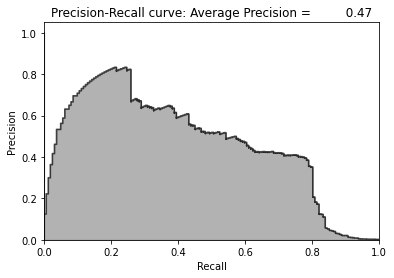

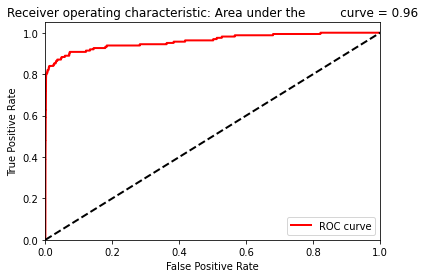

Epoch 1/10
5964/5964 [==============================] - 19s 3ms/step - loss: 0.0666 - accuracy: 0.9246 - val_loss: 0.0010 - val_accuracy: 0.9790
Epoch 2/10
5964/5964 [==============================] - 21s 4ms/step - loss: 0.0017 - accuracy: 0.9938 - val_loss: 0.0015 - val_accuracy: 0.9946
Epoch 3/10
5964/5964 [==============================] - 19s 3ms/step - loss: 9.6904e-04 - accuracy: 0.9917 - val_loss: 3.2126e-05 - val_accuracy: 0.9964
Epoch 4/10
5964/5964 [==============================] - 20s 3ms/step - loss: 7.0444e-04 - accuracy: 0.9933 - val_loss: 2.7099e-06 - val_accuracy: 0.9989
Epoch 5/10
5964/5964 [==============================] - 23s 4ms/step - loss: 9.0273e-04 - accuracy: 0.9935 - val_loss: 0.0024 - val_accuracy: 0.9823
Epoch 6/10
5964/5964 [==============================] - 24s 4ms/step - loss: 8.0140e-04 - accuracy: 0.9931 - val_loss: 9.4456e-06 - val_accuracy: 0.9992
Epoch 7/10
5964/5964 [==============================] - 23s 4ms/step - loss: 4.9863e-04 - accuracy: 0.

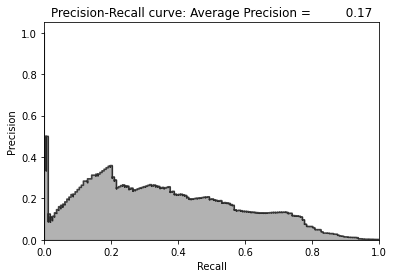

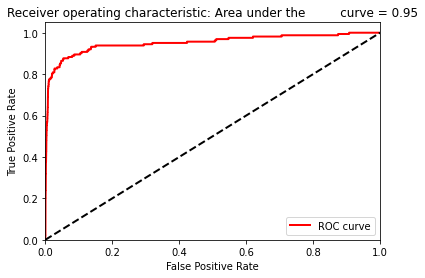

Mean average precision over 10 runs:  0.30057130061603743


[0.15020952543370103,
 0.6867617355299036,
 0.11445458805253647,
 0.05391194969391767,
 0.015296788657020097,
 0.7285333747127833,
 0.2872999079675329,
 0.3337201810752845,
 0.4665096781482788,
 0.16901527688941562]

In [ ]:
# 모델 5
# 선형 활성화 함수를 가진 2-계층 과대완전 오토인코더(은닉층 40개 노드)
# 10번 실행 - 평균 정밀도의 평균 계산
test_scores = []
for i in range(0,10):
    # 신경망 API 호출
    model = Sequential()

    # 전체적으로 선형 활성화 함수 적용
    # 40개 노드를 가진 은닉층 생성
    model.add(Dense(units=40, activation='linear',input_dim=29))

    # 29개 노드를 가진 출력층 생성
    model.add(Dense(units=29, activation='linear'))

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    # 모델 훈련
    num_epochs = 10
    batch_size = 32

    history = model.fit(x=X_train_AE, y=X_train_AE,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        validation_data=(X_train_AE, X_train_AE),
                        verbose=1)

    # 테스트 셋에 대한 평가
    predictions = model.predict(X_test, verbose=1)
    anomalyScoresAE = anomalyScores(X_test, predictions)
    preds, avgPrecision = plotResults(y_test, anomalyScoresAE, True)
    test_scores.append(avgPrecision)
    model.reset_states()

print("Mean average precision over 10 runs: ", np.mean(test_scores))
test_scores

In [ ]:
# 결과
print("Mean average precision over 10 runs: ", np.mean(test_scores))
print("Coefficient of variation over 10 runs: ", np.std(test_scores)/ \
                                                np.mean(test_scores))
test_scores

Mean average precision over 10 runs:  0.30057130061603743
Coefficient of variation over 10 runs:  0.7997832226430313


[0.15020952543370103,
 0.6867617355299036,
 0.11445458805253647,
 0.05391194969391767,
 0.015296788657020097,
 0.7285333747127833,
 0.2872999079675329,
 0.3337201810752845,
 0.4665096781482788,
 0.16901527688941562]

다음 결과는 10번의 실행에 대한 평규 정밀도의 분포를 나타낸다.

평균 정밀도의 결과는 0.30, 변동 계수는 0.79이며 작지 않은 분산이다.

또한 시각화한 결과를 살펴보았을 때, 과대 적합된 과대완전 오토인코더를 볼 수 있다.


따라서 과대완전 오토인코더는 매우 낮은 성능을 보이며, 신용카드 사기 거래를 탐지하는데 적절하지 않은 방법이다.